# ASA COURSEWORK1-CUSTOMER CLUSTERING AND SEGMENTATION
######   20703562 SAMIKSHA KAMATH
### THE ANALYSIS IS DIVIDED INTO 4 DIFFRENT PARTS:
### SECTION 1- Expolatory Data Analysis
### SECTION 2 -RFM Analysis
### SECTION 3 -Feature Engineering
### SECTION 4 -Clustering and Segmentation
[THIS ANALYSIS WAS DONE IN JUPYTER NOTEBOOK AND DATASETS WERE LOADED BY DOWNLOADING ON MY DESKTOP.]

In [ ]:
#IMPORTING ALL THE NECESSARY LIBRARIES FOR THIS ANALYSIS
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

The code imports essential libraries for data handling, visualization, and clustering analysis. pandas and numpy manage datasets and numerical operations, while seaborn and matplotlib help visualize data for better insights. KMeans from sklearn.cluster is used for clustering, and silhouette_score evaluates cluster quality. These libraries ensure efficient data analysis and model evaluation.

In [ ]:
# Load datasets (Ensure the file paths match the actual location)
#Download the datasets on your desktop/collab upload section and paste the paths for each of the dataset here:
customers_df = pd.read_csv("/content/customers_sample.csv")#<----Change path accordingly
category_spends_df = pd.read_csv("/content/category_spends_sample.csv")
baskets_df= pd.read_csv("/content/baskets_sample.csv")
lineitems_df= pd.read_csv("/content/lineitems_sample.csv")

This code loaded multiple datasets-customers_df, category_spends_df, baskets_df, and lineitems_df.Loading these datasets is a crucial first step in data preprocessing, allowing for further exploration, transformation, and analysis in clustering and pattern identification.

# Section 1
## EXPLOLATORY DATA ANALYSIS
### A) Data Inspection and Cleaning:
### - Customer Dataset

In [ ]:
# Check data structure and missing values
print("Customers Data Overview:")
print(customers_df.info())  # Column names, data types, and null values

Customers Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_number   3000 non-null   int64  
 1   baskets           3000 non-null   int64  
 2   total_quantity    3000 non-null   int64  
 3   average_quantity  3000 non-null   float64
 4   total_spend       3000 non-null   object 
 5   average_spend     3000 non-null   object 
dtypes: float64(1), int64(3), object(2)
memory usage: 140.8+ KB
None


In [ ]:
# Check first few rows
print("\nFirst Few Rows:")
print(customers_df.head())


First Few Rows:
   customer_number  baskets  total_quantity  average_quantity total_spend  \
0             4749      220             260          1.181818     £631.12   
1             4757      248             333          1.342742     £452.42   
2              144      226             303          1.340708     £261.16   
3              572      285             346          1.214035     £638.79   
4              669      285             324          1.136842     £561.42   

  average_spend  
0         £2.87  
1         £1.82  
2         £1.16  
3         £2.24  
4         £1.97  


In [ ]:
# Check for missing values
print("\nMissing Values in Customers Data:")
print(customers_df.isnull().sum())


Missing Values in Customers Data:
customer_number     0
baskets             0
total_quantity      0
average_quantity    0
total_spend         0
average_spend       0
dtype: int64


In [ ]:
# Check for negative values (only in numerical columns)
print("\nNegative Values Check in Customers Data:")
print((customers_df.select_dtypes(include=['number']) < 0).sum())


Negative Values Check in Customers Data:
customer_number     0
baskets             0
total_quantity      0
average_quantity    0
dtype: int64


In [ ]:
# Check for duplicate rows
print("\nDuplicate Rows:", customers_df.duplicated().sum())


Duplicate Rows: 0


In [ ]:
# Describe numerical data for summary statistics
print("\nSummary Statistics:")
print(customers_df.describe())


Summary Statistics:
       customer_number      baskets  total_quantity  average_quantity
count      3000.000000  3000.000000     3000.000000       3000.000000
mean       8095.724333   487.105000      583.722000          1.204499
std        4686.259488   332.824524      405.006359          0.136323
min          14.000000     6.000000        6.000000          1.000000
25%        4044.750000   257.000000      307.750000          1.119625
50%        8218.500000   417.000000      495.000000          1.175889
75%       12115.500000   628.250000      744.250000          1.250430
max       16316.000000  3119.000000     4949.000000          2.503686


The  Customers dataset has no missing values, duplicates, or negative values. All category spend columns are stored as objects due to the "£" symbol.The dataset includes key features such as baskets (number of visits), total quantity purchased, and average quantity per visit. The total quantity of items purchased varies significantly,The summary statistics indicate that customers, on average, make 487 purchases (baskets) and buy around 584 items, though there is high variability in spending behavior (std = 405), with some customers making as few as 6 purchases while others exceed 3,000, suggesting a diverse customer base with varying engagement levels.

In [ ]:
#Preprocessing chnages to customer_df
# Convert 'total_spend' and 'average_spend' to numeric values
customers_df['total_spend'] = customers_df['total_spend'].replace('[£,]', '', regex=True).astype(float)
customers_df['average_spend'] = customers_df['average_spend'].replace('[£,]', '', regex=True).astype(float)

# Check the updated data types
print("Updated Data Types After Cleaning:")
print(customers_df.dtypes)

# Verify the first few rows
print("\nFirst Few Rows After Cleaning:")
print(customers_df.head())

Updated Data Types After Cleaning:
customer_number       int64
baskets               int64
total_quantity        int64
average_quantity    float64
total_spend         float64
average_spend       float64
dtype: object

First Few Rows After Cleaning:
   customer_number  baskets  total_quantity  average_quantity  total_spend  \
0             4749      220             260          1.181818       631.12   
1             4757      248             333          1.342742       452.42   
2              144      226             303          1.340708       261.16   
3              572      285             346          1.214035       638.79   
4              669      285             324          1.136842       561.42   

   average_spend  
0           2.87  
1           1.82  
2           1.16  
3           2.24  
4           1.97  


The preprocessing ensures total_spend and average_spend are converted to numeric values by removing currency symbols and commas using regex replacement, followed by type conversion to float.This data set is ready for further analysis.

## -Category spends Dataset

In [ ]:
# Check data structure and missing values
print("Category Spends Data Overview:")
print(category_spends_df.info())

Category Spends Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   customer_number       3000 non-null   int64 
 1   fruit_veg             3000 non-null   object
 2   dairy                 3000 non-null   object
 3   confectionary         3000 non-null   object
 4   grocery_food          3000 non-null   object
 5   grocery_health_pets   3000 non-null   object
 6   bakery                3000 non-null   object
 7   newspapers_magazines  3000 non-null   object
 8   prepared_meals        3000 non-null   object
 9   soft_drinks           3000 non-null   object
 10  frozen                3000 non-null   object
 11  meat                  3000 non-null   object
 12  tobacco               3000 non-null   object
 13  drinks                3000 non-null   object
 14  deli                  3000 non-null   object
 15  world_f

In [ ]:
# Check first few rows
print("\nFirst Few Rows:")
print(category_spends_df.head())


First Few Rows:
   customer_number fruit_veg    dairy confectionary grocery_food  \
0            11387    £64.58   £35.91       £107.78       £27.08   
1             8171    £16.89   £37.24        £28.84       £33.43   
2             1060    £87.30   £82.98        £49.88       £20.57   
3             3728    £84.05  £186.56       £175.50      £119.84   
4            14621    £35.16  £121.31        £79.23       £29.03   

  grocery_health_pets bakery newspapers_magazines prepared_meals soft_drinks  \
0              £29.59  £0.00               £54.83          £6.35      £22.83   
1              £66.40  £0.00               £22.06         £12.09       £2.34   
2              £37.04  £0.00                £9.85         £57.98      £31.12   
3             £111.08  £0.00               £13.05         £25.54     £124.42   
4              £37.17  £0.00               £40.06          £0.00       £4.68   

   ...    meat  tobacco  drinks    deli world_foods lottery cashpoint  \
0  ...  £28.62  £162

In [ ]:
# Check for missing values
print("\nMissing Values in Category Spends Data:")
print(category_spends_df.isnull().sum())


Missing Values in Category Spends Data:
customer_number         0
fruit_veg               0
dairy                   0
confectionary           0
grocery_food            0
grocery_health_pets     0
bakery                  0
newspapers_magazines    0
prepared_meals          0
soft_drinks             0
frozen                  0
meat                    0
tobacco                 0
drinks                  0
deli                    0
world_foods             0
lottery                 0
cashpoint               0
seasonal_gifting        0
discount_bakery         0
practical_items         0
dtype: int64


In [ ]:
# Check for negative values (only in numerical columns)
print("\nNegative Values Check in Category Spends Data:")
print((category_spends_df.select_dtypes(include=['number']) < 0).sum())


Negative Values Check in Category Spends Data:
customer_number    0
dtype: int64


In [ ]:
# Check for duplicate rows
print("\nDuplicate Rows:", category_spends_df.duplicated().sum())


Duplicate Rows: 0


In [ ]:
# Describe numerical data for summary statistics
print("\nSummary Statistics:")
print(category_spends_df.describe())


Summary Statistics:
       customer_number
count      3000.000000
mean       8095.724333
std        4686.259488
min          14.000000
25%        4044.750000
50%        8218.500000
75%       12115.500000
max       16316.000000


The Category Spends dataset has no missing values, duplicates, or negative values, ensuring data integrity. All spend columns are stored as objects due to the presence of the "£" symbol, requiring conversion to numeric for analysis. The dataset consists of 3,000 entries with 21 columns, including various spending categories.
The dataset records customer spending across 20 product categories, including fruit & vegetables, dairy, confectionery, and drinks, among others. Some categories, such as lottery and cashpoint, have values of zero, indicating either non-purchases or refunds.

In [ ]:
# Convert all category spend columns to numeric values by removing "£" symbols
category_columns = category_spends_df.columns[1:]  # Exclude 'customer_number'
category_spends_df[category_columns] = category_spends_df[category_columns].replace('[£,]', '', regex=True).astype(float)

# Check the updated data types
print("Updated Data Types After Cleaning:")
print(category_spends_df.dtypes)

# Verify the first few rows
print("\nFirst Few Rows After Cleaning:")
print(category_spends_df.head())

Updated Data Types After Cleaning:
customer_number           int64
fruit_veg               float64
dairy                   float64
confectionary           float64
grocery_food            float64
grocery_health_pets     float64
bakery                  float64
newspapers_magazines    float64
prepared_meals          float64
soft_drinks             float64
frozen                  float64
meat                    float64
tobacco                 float64
drinks                  float64
deli                    float64
world_foods             float64
lottery                 float64
cashpoint               float64
seasonal_gifting        float64
discount_bakery         float64
practical_items         float64
dtype: object

First Few Rows After Cleaning:
   customer_number  fruit_veg   dairy  confectionary  grocery_food  \
0            11387      64.58   35.91         107.78         27.08   
1             8171      16.89   37.24          28.84         33.43   
2             1060      87.30   82.98

The preprocessing step removes the "£" symbol from all category spend columns using regex replacement and converts them to float for numerical analysis.This dataset is ready for further analysis

## -Baskets Dataset

In [ ]:
# Check data structure and missing values
print("Baskets Data Overview:")
print(baskets_df.info())

Baskets Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195547 entries, 0 to 195546
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   customer_number    195547 non-null  int64 
 1   purchase_time      195547 non-null  object
 2   basket_quantity    195547 non-null  int64 
 3   basket_spend       195547 non-null  object
 4   basket_categories  195547 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 7.5+ MB
None


In [ ]:
# Check first few rows
print("\nFirst Few Rows:")
print(baskets_df.head())


First Few Rows:
   customer_number        purchase_time  basket_quantity basket_spend  \
0            11911  2007-03-01 07:06:00                7        £3.09   
1             4047  2007-03-01 07:13:00                9        £7.99   
2             3571  2007-03-01 07:27:00                9       £37.06   
3             4079  2007-03-01 07:34:00               11       £11.91   
4             6063  2007-03-01 07:36:00                3        £1.45   

   basket_categories  
0                  3  
1                  5  
2                  6  
3                  5  
4                  1  


In [ ]:
# Check for missing values
print("\nMissing Values in Baskets Data:")
print(baskets_df.isnull().sum())


Missing Values in Baskets Data:
customer_number      0
purchase_time        0
basket_quantity      0
basket_spend         0
basket_categories    0
dtype: int64


In [ ]:
# Check for negative values (only in numerical columns)
print("\nNegative Values Check in Baskets Data:")
print((baskets_df.select_dtypes(include=['number']) < 0).sum())


Negative Values Check in Baskets Data:
customer_number       0
basket_quantity      19
basket_categories     0
dtype: int64


In [ ]:
# Check for duplicate rows
print("\nDuplicate Rows:", baskets_df.duplicated().sum())


Duplicate Rows: 0


In [ ]:
# Describe numerical data for summary statistics
print("\nSummary Statistics:")
print(baskets_df.describe())


Summary Statistics:
       customer_number  basket_quantity  basket_categories
count    195547.000000    195547.000000      195547.000000
mean       7896.492899         8.955218           4.231990
std        4408.251411         9.510890           2.478016
min          14.000000       -11.000000           1.000000
25%        4323.000000         3.000000           2.000000
50%        7944.000000         6.000000           4.000000
75%       11324.000000        11.000000           6.000000
max       16316.000000       190.000000          16.000000


The Baskets dataset has 195,547 entries with no missing values or duplicates, ensuring data integrity. The basket_spend column is stored as an object due to the "£" symbol and requires conversion to float for analysis. The purchase_time column, currently an object, should be converted to datetime for time-based insights. Notably, basket_quantity contains 19 negative values, which may indicate refunds or data entry errors and should be addressed accordingly.The baskets dataset contains 195,547 transactions, where customers, on average, purchase around 9 items per basket across 4 product categories and some high-value customers purchase up to 190 items in a single transaction, reflecting strong engagement.

In [ ]:
# Convert 'basket_spend' to numeric by removing "£" symbol
baskets_df['basket_spend'] = baskets_df['basket_spend'].replace('[£,]', '', regex=True).astype(float)

# Convert 'purchase_time' to datetime format
baskets_df['purchase_time'] = pd.to_datetime(baskets_df['purchase_time'])

# Check the updated data types
print("Updated Data Types After Cleaning:")
print(baskets_df.dtypes)

# Verify the first few rows
print("\nFirst Few Rows After Cleaning:")
print(baskets_df.head())


Updated Data Types After Cleaning:
customer_number               int64
purchase_time        datetime64[ns]
basket_quantity               int64
basket_spend                float64
basket_categories             int64
dtype: object

First Few Rows After Cleaning:
   customer_number       purchase_time  basket_quantity  basket_spend  \
0            11911 2007-03-01 07:06:00                7          3.09   
1             4047 2007-03-01 07:13:00                9          7.99   
2             3571 2007-03-01 07:27:00                9         37.06   
3             4079 2007-03-01 07:34:00               11         11.91   
4             6063 2007-03-01 07:36:00                3          1.45   

   basket_categories  
0                  3  
1                  5  
2                  6  
3                  5  
4                  1  


The preprocessing updates basket_spend by removing the "£" symbol and converting it to float, ensuring accurate calculations for financial analysis. The purchase_time column is converted to datetime format.This data is ready for further analysis.

## -Line Items Dataset:

In [ ]:
# Check data structure and missing values
print("Line Items Data Overview:")
print(lineitems_df.info())


Line Items Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461315 entries, 0 to 1461314
Data columns (total 6 columns):
 #   Column           Non-Null Count    Dtype 
---  ------           --------------    ----- 
 0   customer_number  1461315 non-null  int64 
 1   purchase_time    1461315 non-null  object
 2   product_id       1461315 non-null  int64 
 3   category         1461315 non-null  object
 4   quantity         1461315 non-null  int64 
 5   spend            1461315 non-null  object
dtypes: int64(3), object(3)
memory usage: 66.9+ MB
None


In [ ]:
# Check first few rows
print("\nFirst Few Rows:")
print(lineitems_df.head())


First Few Rows:
   customer_number        purchase_time  product_id             category  \
0            14577  2007-03-10 11:58:00      722653         GROCERY_FOOD   
1             7210  2007-03-22 10:53:00      696136  GROCERY_HEALTH_PETS   
2             3145  2007-03-26 11:17:00      139543  GROCERY_HEALTH_PETS   
3             2649  2007-03-12 16:05:00       34890               BAKERY   
4              859  2007-03-10 09:53:00      613984               BAKERY   

   quantity  spend  
0         1  £1.39  
1         1  £4.25  
2         1  £0.50  
3         1  £0.57  
4         1  £1.59  


In [ ]:
# Check for missing values
print("\nMissing Values in Line Items Data:")
print(lineitems_df.isnull().sum())


Missing Values in Line Items Data:
customer_number    0
purchase_time      0
product_id         0
category           0
quantity           0
spend              0
dtype: int64


In [ ]:
# Check for negative values (only in numerical columns)
print("\nNegative Values Check in Line Items Data:")
print((lineitems_df.select_dtypes(include=['number']) < 0).sum())


Negative Values Check in Line Items Data:
customer_number      0
product_id           0
quantity           864
dtype: int64


In [ ]:
# Check for duplicate rows
print("\nDuplicate Rows:", lineitems_df.duplicated().sum())


Duplicate Rows: 114


In [ ]:
# Check how many exact duplicate rows exist
#Exact duplicate rows are being removed as they are likely data entry or system logging errors, where transactions were recorded twice without actual repeat purchases. Retaining these duplicates would artificially inflate spending and purchase frequency, leading to inaccurate customer segmentation and misleading analysis.
print("Total duplicate rows:", lineitems_df.duplicated().sum())

# Display some duplicate rows to inspect them
duplicate_rows = lineitems_df[lineitems_df.duplicated()]
print("\nSample Duplicate Rows:")
print(duplicate_rows.head(10))

Total duplicate rows: 114

Sample Duplicate Rows:
        customer_number        purchase_time  product_id  \
38242              3028  2007-03-26 09:37:00      691085   
52170              4300  2007-03-09 17:04:00       40243   
62032              2988  2007-03-30 13:19:00      722356   
90578              9902  2007-03-25 18:03:00       40243   
114177             7126  2007-03-03 14:43:00      712999   
138683             3424  2007-03-26 12:49:00      714331   
147039            12120  2007-03-28 11:39:00      731610   
150064             6759  2007-03-29 18:44:00      131436   
151330             9927  2007-03-26 10:38:00      155634   
177290            13182  2007-03-09 10:46:00       60273   

                    category  quantity  spend  
38242              CASHPOINT         1  £5.00  
52170                  DAIRY         1  £0.68  
62032          CONFECTIONARY         1  £0.99  
90578                  DAIRY         1  £0.71  
114177             CASHPOINT         1  £5.00  
1

In [ ]:
# Describe numerical data for summary statistics
print("\nSummary Statistics:")
print(lineitems_df.describe())


Summary Statistics:
       customer_number    product_id      quantity
count     1.461315e+06  1.461315e+06  1.461315e+06
mean      7.748199e+03  3.940964e+05  1.198349e+00
std       4.405076e+03  2.989743e+05  5.990824e-01
min       1.400000e+01  2.200000e+01 -1.300000e+01
25%       4.028000e+03  6.027800e+04  1.000000e+00
50%       7.823000e+03  5.612280e+05  1.000000e+00
75%       1.121100e+04  6.953890e+05  1.000000e+00
max       1.631600e+04  7.450580e+05  1.000000e+02


The line items dataset contains 1,461,315 records with no missing values but has 864 negative values in the quantity column,there are also 114 duplicate rows. likely due to refunds or data entry errors. Additionally, spend is stored as an object due to the presence of the "£" symbol, requiring conversion to a numeric format. The dataset includes customer transactions at the product level, detailing purchase time, product ID, category, quantity purchased, and spend per item. The quantity ranges from -13 to 100, with most values clustered around 1, indicating that single-item purchases are common.

In [ ]:
# Convert 'spend' column to numeric by removing "£" symbol
lineitems_df['spend'] = lineitems_df['spend'].replace('[£,]', '', regex=True).astype(float)

# Convert 'purchase_time' to datetime
lineitems_df['purchase_time'] = pd.to_datetime(lineitems_df['purchase_time'])

# Remove duplicate rows
lineitems_df = lineitems_df.drop_duplicates()

# Verify changes
print("Updated Data Types After Cleaning:")
print(lineitems_df.dtypes)

print("\nFirst Few Rows After Cleaning:")
print(lineitems_df.head())

# Check if duplicates were removed
print("\nRemaining Duplicate Rows:", lineitems_df.duplicated().sum())

Updated Data Types After Cleaning:
customer_number             int64
purchase_time      datetime64[ns]
product_id                  int64
category                   object
quantity                    int64
spend                     float64
dtype: object

First Few Rows After Cleaning:
   customer_number       purchase_time  product_id             category  \
0            14577 2007-03-10 11:58:00      722653         GROCERY_FOOD   
1             7210 2007-03-22 10:53:00      696136  GROCERY_HEALTH_PETS   
2             3145 2007-03-26 11:17:00      139543  GROCERY_HEALTH_PETS   
3             2649 2007-03-12 16:05:00       34890               BAKERY   
4              859 2007-03-10 09:53:00      613984               BAKERY   

   quantity  spend  
0         1   1.39  
1         1   4.25  
2         1   0.50  
3         1   0.57  
4         1   1.59  

Remaining Duplicate Rows: 0


The preprocessing ensures spend is converted to a numeric format by removing the "£" symbol, allowing accurate financial calculations. The purchase_time column is transformed into datetime format, enabling time-based analysis. Duplicate rows are removed using drop_duplicates(), ensuring data integrity.This dataset is ready for further analysis.

## B) Exploring Data Distributions and Customer Behavior:
### -Customers Dataset:


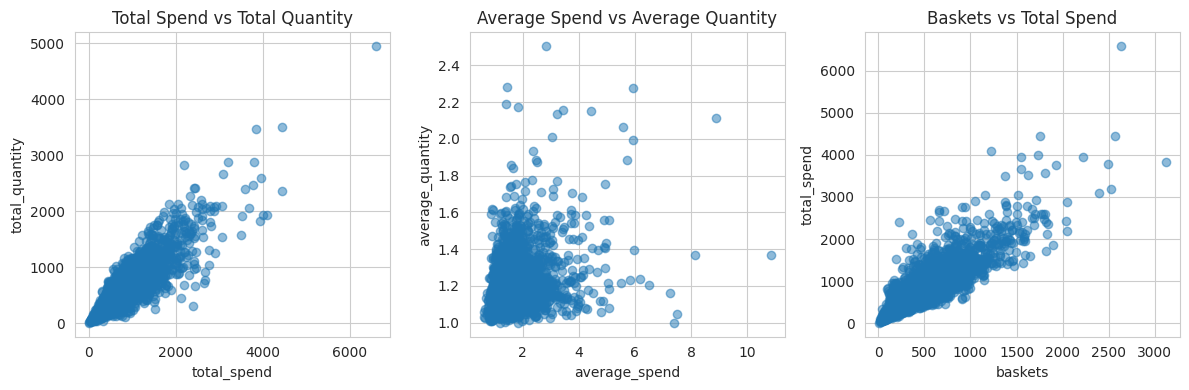

In [ ]:
plots = {
    'Total Spend vs Total Quantity': ('total_spend', 'total_quantity'),
    'Average Spend vs Average Quantity': ('average_spend', 'average_quantity'),
    'Baskets vs Total Spend': ('baskets', 'total_spend')
}

# Plotting the graphs using subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

for ax, (title, (x_col, y_col)) in zip(axes, plots.items()):
    ax.scatter(customers_df[x_col], customers_df[y_col], alpha=0.5)
    ax.set_title(title)
    ax.set_xlabel(x_col)
    ax.set_ylabel(y_col)
    ax.grid(True)

plt.tight_layout()
plt.show()

It is observed here that customers who spend more also tend to purchase larger quantities of items, and those who visit more frequently (higher number of baskets) generally have higher total spending, while bulk buyers benefit from lower unit prices, and big-ticket shoppers make fewer but higher-value transactions. The scatter plots (total spend vs. quantity, average spend vs. average quantity, and baskets vs. total spend) suggest a positive correlation, meaning customers who buy more tend to spend more, but there are outliers who either spend a lot on fewer items (premium buyers) or purchase high quantities at lower spend (bulk budget buyers).

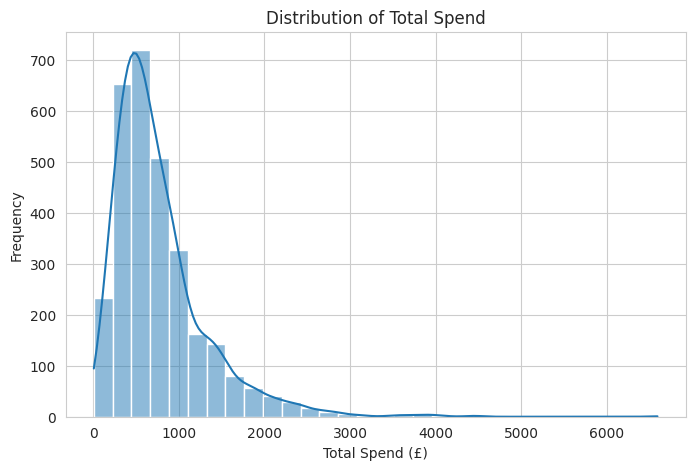

In [ ]:
# Histogram of total spend
plt.figure(figsize=(8,5))
sns.histplot(customers_df['total_spend'], bins=30, kde=True)
plt.title("Distribution of Total Spend")
plt.xlabel("Total Spend (£)")
plt.ylabel("Frequency")
plt.show()

The distribution of total spend shows a right-skewed pattern, indicating that most customers have relatively low spending, with a few high spenders significantly increasing the upper range.

## -Category Spends Dataset:

<ipython-input-183-12727a3925e1>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_spend_sums_sorted.index,y=category_spend_sums_sorted.values,palette="husl")


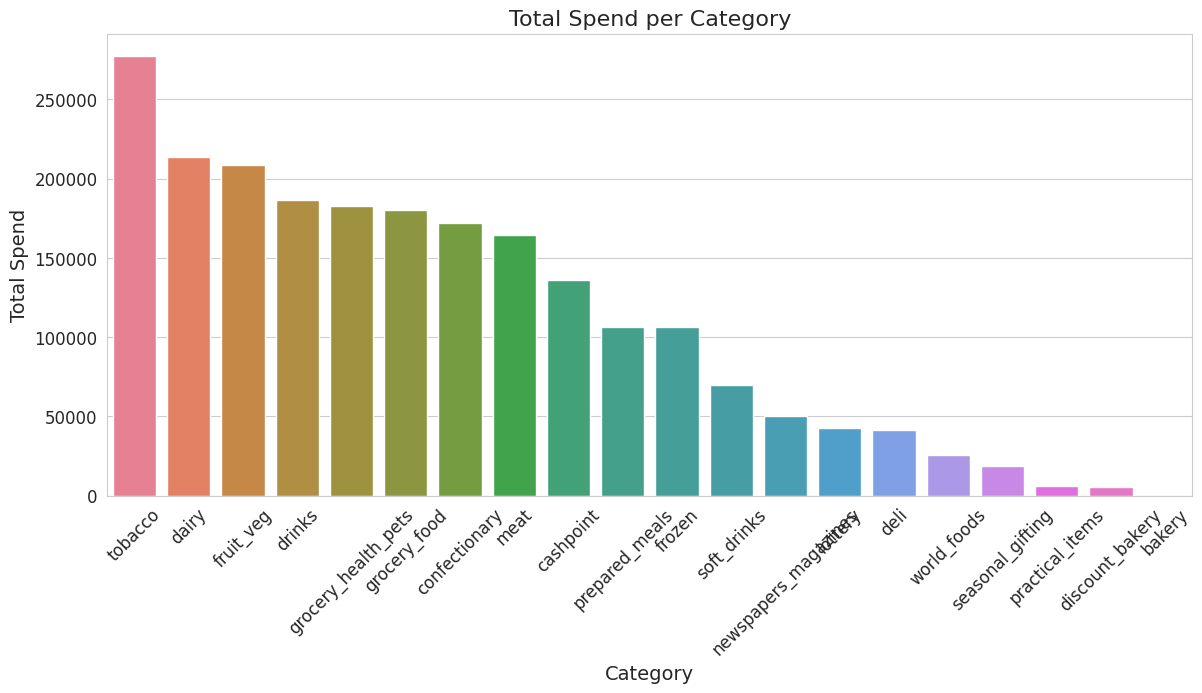

In [ ]:
category_spend_sums_sorted = category_spend_sums.sort_values(ascending=False)
sns.set_style("whitegrid")
plt.figure(figsize=(14,6))

sns.barplot(x=category_spend_sums_sorted.index,y=category_spend_sums_sorted.values,palette="husl")
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Category", fontsize=14)
plt.ylabel("Total Spend", fontsize=14)
plt.title("Total Spend per Category", fontsize=16)
plt.show()

The **bar plot of total spend per category** reveals that **tobacco, dairy, and fruit & veg** are the highest revenue-generating categories, indicating these are **key profit drivers**. In contrast, **discount bakery and practical items have minimal spending**, suggesting they cater to a **small segment of budget-conscious shoppers**.

## -Basket spends Dataset:

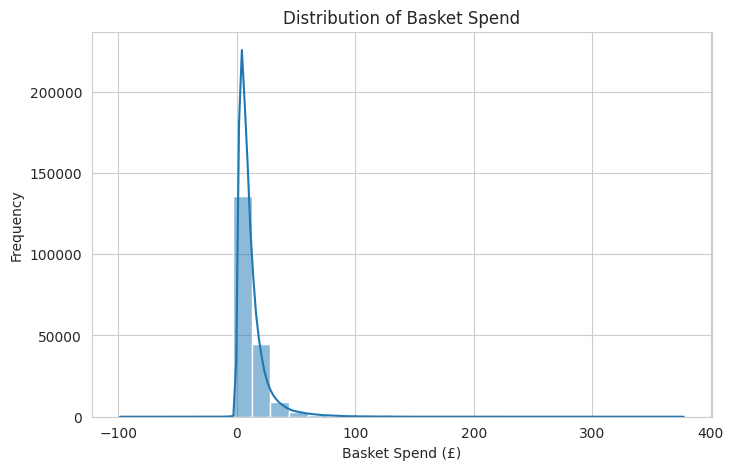

In [ ]:
# Histogram of Basket Spend
plt.figure(figsize=(8,5))
sns.histplot(baskets_df['basket_spend'], bins=30, kde=True)
plt.title("Distribution of Basket Spend")
plt.xlabel("Basket Spend (£)")
plt.ylabel("Frequency")
plt.show()

The distribution of basket spend is highly right-skewed, indicating that most baskets have low spend values, but there are a few high-value transactions. The presence of negative spend values suggests refunds or corrections in transactions.

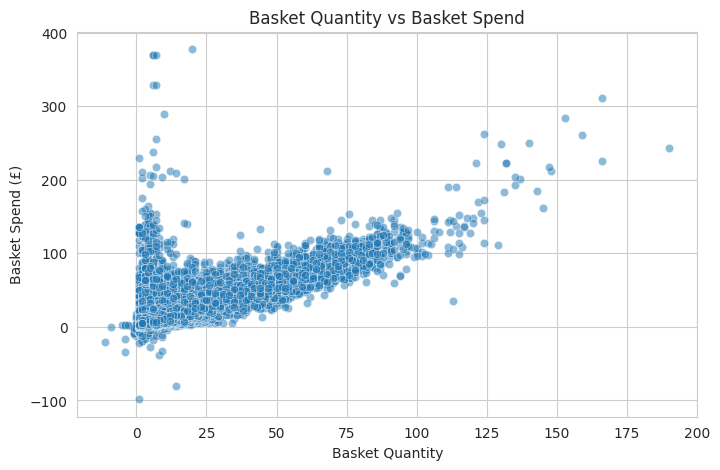

In [ ]:
# Scatterplot of Basket Quantity vs Basket Spend
plt.figure(figsize=(8,5))
sns.scatterplot(x=baskets_df['basket_quantity'], y=baskets_df['basket_spend'], alpha=0.5)
plt.title("Basket Quantity vs Basket Spend")
plt.xlabel("Basket Quantity")
plt.ylabel("Basket Spend (£)")
plt.show()

The scatter plot of basket quantity vs. basket spend shows a positive correlation, meaning as customers buy more items, their total spend increases. However, there is significant variance, with some customers spending more despite buying fewer items—this could indicate purchases of high-value products or premium items. The dense clustering at lower basket quantities suggests that many customers make small, low-spend purchases, likely for essentials or impulse buys.

##  -Line Items Dataset:

<ipython-input-186-a59aa63f140d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=category_counts.index, x=category_counts.values, palette="husl")


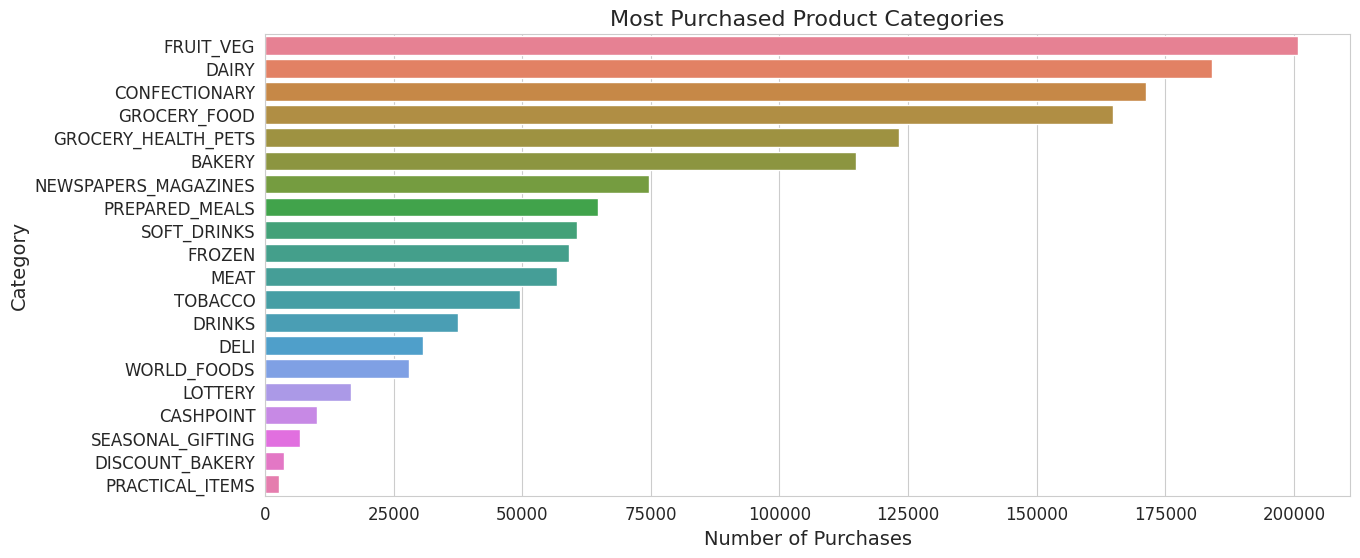

In [ ]:
# Barplot of Most Purchased Categories
category_counts = lineitems_df['category'].value_counts()

# Set Seaborn style for better aesthetics
sns.set_style("whitegrid")
plt.figure(figsize=(14,6))

# Create a horizontal bar plot with a colorful palette
sns.barplot(y=category_counts.index, x=category_counts.values, palette="husl")

plt.xlabel("Number of Purchases", fontsize=14,)
plt.ylabel("Category", fontsize=14)
plt.title("Most Purchased Product Categories", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

The most purchased product categories are dominated by fresh essentials like fruit & vegetables, dairy, and grocery items, while non-essential and occasional purchases such as seasonal gifting, lottery, and practical items have significantly lower demand, indicating a strong preference for daily necessities among customers.

<ipython-input-187-1fce1996c3cf>:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  total_spend_over_time = lineitems_df.groupby(pd.Grouper(key='purchase_time', freq='M'))['spend'].sum()
<ipython-input-187-1fce1996c3cf>:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  total_quantity_over_time = lineitems_df.groupby(pd.Grouper(key='purchase_time', freq='M'))['quantity'].sum()


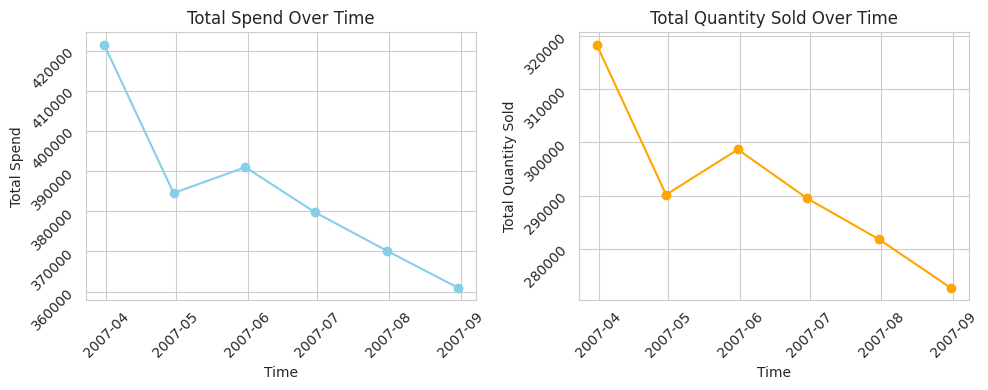

In [ ]:
lineitems_df['purchase_time'] = pd.to_datetime(lineitems_df['purchase_time'])

# Extract date from purchase_time
lineitems_df['purchase_date'] = lineitems_df['purchase_time'].dt.date

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# Plot total spend over time
total_spend_over_time = lineitems_df.groupby(pd.Grouper(key='purchase_time', freq='M'))['spend'].sum()
axes[0].plot(total_spend_over_time.index, total_spend_over_time.values, marker='o', color='skyblue', linestyle='-')
axes[0].set_xlabel('Time')
axes[0].set_ylabel('Total Spend')
axes[0].set_title('Total Spend Over Time')
axes[0].grid(True)
axes[0].tick_params(rotation=45)

# Plot total quantity sold over time
total_quantity_over_time = lineitems_df.groupby(pd.Grouper(key='purchase_time', freq='M'))['quantity'].sum()
axes[1].plot(total_quantity_over_time.index, total_quantity_over_time.values, marker='o', color='orange', linestyle='-')
axes[1].set_xlabel('Time')
axes[1].set_ylabel('Total Quantity Sold')
axes[1].set_title('Total Quantity Sold Over Time')
axes[1].grid(True)
axes[1].tick_params(rotation=45)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

The parallel decline in total spend and total quantity sold suggests that customers are not only purchasing fewer items over time but also spending less overall, indicating a possible shift in shopping behavior, changes in product pricing, or external economic influences affecting consumer spending.

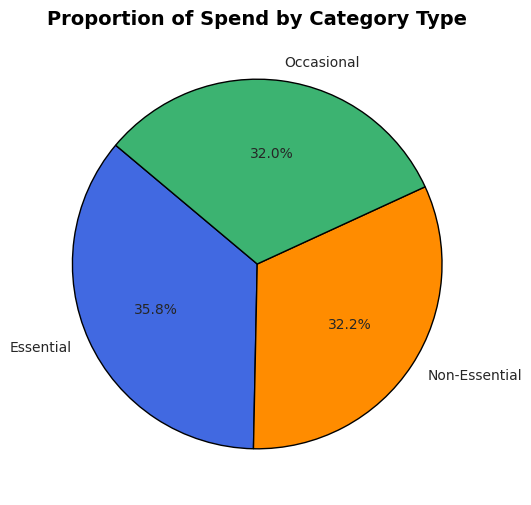

In [ ]:
# Define category groups
essential_categories = ['fruit_veg', 'dairy', 'grocery_food', 'grocery_health_pets']
non_essential_categories = ['bakery', 'discount_bakery', 'drinks', 'frozen', 'deli', 'meat', 'prepared_meals', 'soft_drinks', 'world_foods']
occasional_categories = ['cashpoint', 'confectionary', 'lottery', 'tobacco', 'newspapers_magazines', 'practical_items', 'seasonal_gifting']

# Aggregate total spend for each category group
essential_spend = category_spends_df[essential_categories].sum().sum()
non_essential_spend = category_spends_df[non_essential_categories].sum().sum()
occasional_spend = category_spends_df[occasional_categories].sum().sum()

# Create a DataFrame for visualization
category_summary = pd.DataFrame({
    "Category Type": ["Essential", "Non-Essential", "Occasional"],
    "Total Spend": [essential_spend, non_essential_spend, occasional_spend]
})

#Pie Chart for Spending Proportions
colors = ['royalblue', 'darkorange', 'mediumseagreen']

plt.figure(figsize=(8, 6))
plt.pie(category_summary["Total Spend"],
    labels=category_summary["Category Type"],
    autopct='%1.1f%%',
    colors=colors,
    startangle=140,
    wedgeprops={'edgecolor': 'black', 'linewidth': 1.0}
)

plt.title("Proportion of Spend by Category Type", fontsize=14, fontweight='bold', color='black')
plt.show()


The spending distribution across category types shows that essential products (e.g., groceries and health items) account for the highest share 35.8%, but non-essential 32.2% and occasional 32% spending are almost equal, indicating a balanced shopping behavior where customers prioritize necessities while still allocating a significant portion of their budget to discretionary and impulse purchases.

## C) Feature Importance Score:

The primary objective in this segment is to analyze feature importance in customer segmentation and identify key factors driving purchasing behavior. This is achieved using K-Means clustering after merging multiple datasets, preprocessing data, standardizing features, and evaluating cluster variance to determine the most influential attributes.

In [ ]:
# Merge category spending with customers table
merged_df = customers_df.merge(category_spends_df, on="customer_number", how="left")

# Aggregate basket-level data
basket_agg = baskets_df.groupby("customer_number").agg({
    "basket_spend": "sum",  # Total basket spend per customer
    "basket_quantity": "sum",  # Total quantity purchased
    "basket_categories": "mean"  # Average unique categories per transaction
}).reset_index()

# Merge basket-level data
merged_df = merged_df.merge(basket_agg, on="customer_number", how="left")

# Aggregate line-item level data (product purchases)
lineitem_agg = lineitems_df.groupby("customer_number").agg({
    "spend": "sum",  # Total spend from item-level transactions
    "quantity": "sum",  # Total items purchased
    "category": lambda x: x.nunique()  # Number of unique categories bought
}).reset_index()

# Rename columns for clarity
lineitem_agg.rename(columns={"spend": "total_item_spend", "quantity": "total_items", "category": "unique_product_categories"}, inplace=True)

# Merge line-item level data
merged_df = merged_df.merge(lineitem_agg, on="customer_number", how="left")

# Display the first few rows
print(merged_df.head())

   customer_number  baskets  total_quantity  average_quantity  total_spend  \
0             4749      220             260          1.181818       631.12   
1             4757      248             333          1.342742       452.42   
2              144      226             303          1.340708       261.16   
3              572      285             346          1.214035       638.79   
4              669      285             324          1.136842       561.42   

   average_spend  fruit_veg   dairy  confectionary  grocery_food  ...  \
0           2.87      14.45   35.61          24.01          9.99  ...   
1           1.82      82.21  162.78          46.03         21.16  ...   
2           1.16      35.32   36.67          48.90         64.14  ...   
3           2.24      39.98   16.83          43.84         13.48  ...   
4           1.97      14.69   18.41           6.53          3.47  ...   

   cashpoint  seasonal_gifting  discount_bakery  practical_items  \
0      290.0            

In [ ]:
# Check how many NaN values exist after merging
print("Missing values per column:")
print(merged_df.isnull().sum())

# Check the shape of the dataset (should match customer count)
print("\nShape of merged dataset:", merged_df.shape)

Missing values per column:
customer_number              0
baskets                      0
total_quantity               0
average_quantity             0
total_spend                  0
average_spend                0
fruit_veg                    0
dairy                        0
confectionary                0
grocery_food                 0
grocery_health_pets          0
bakery                       0
newspapers_magazines         0
prepared_meals               0
soft_drinks                  0
frozen                       0
meat                         0
tobacco                      0
drinks                       0
deli                         0
world_foods                  0
lottery                      0
cashpoint                    0
seasonal_gifting             0
discount_bakery              0
practical_items              0
basket_spend                 0
basket_quantity              0
basket_categories            0
total_item_spend             0
total_items                  0
unique_produ

In [ ]:
# Drop redundant features based on high correlation
features_to_drop = [
    'total_item_spend',  # Redundant with total_spend
    'basket_spend',  # Redundant with total_spend
    'total_items',  # Redundant with total_quantity
    'basket_quantity',  # Redundant with total_quantity
]

# Create a cleaned dataset
merged_df_cleaned = merged_df.drop(columns=features_to_drop)

# Drop customer_number before clustering
features_for_kmeans = merged_df_cleaned.drop(columns=['customer_number'])

# Display updated feature set
print("Remaining Features:", merged_df_cleaned.columns.tolist())

Remaining Features: ['customer_number', 'baskets', 'total_quantity', 'average_quantity', 'total_spend', 'average_spend', 'fruit_veg', 'dairy', 'confectionary', 'grocery_food', 'grocery_health_pets', 'bakery', 'newspapers_magazines', 'prepared_meals', 'soft_drinks', 'frozen', 'meat', 'tobacco', 'drinks', 'deli', 'world_foods', 'lottery', 'cashpoint', 'seasonal_gifting', 'discount_bakery', 'practical_items', 'basket_categories', 'unique_product_categories']


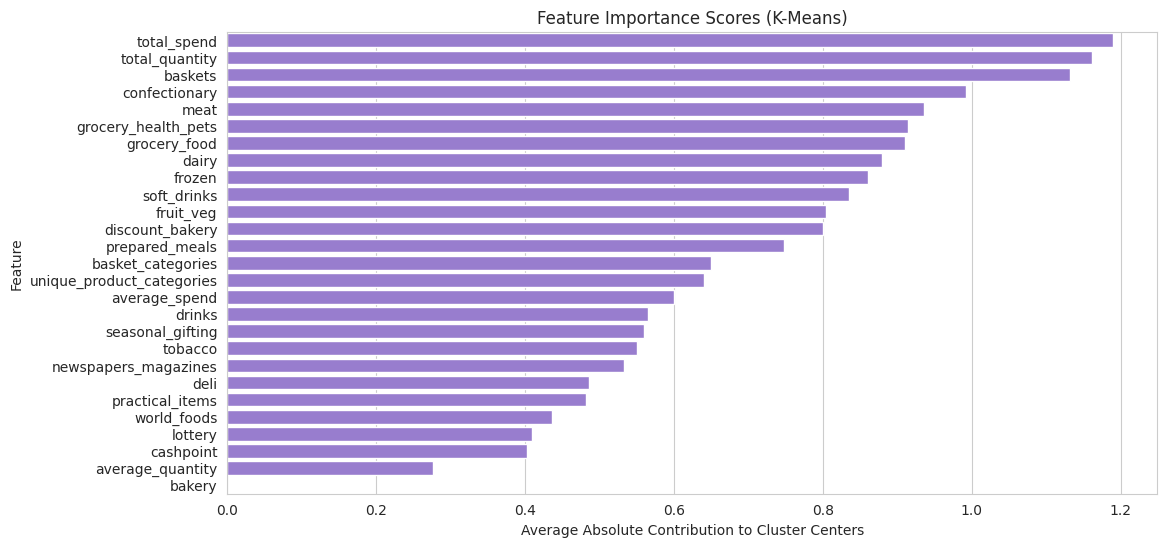

In [ ]:
# Standardize the data
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(features_for_kmeans), columns=features_for_kmeans.columns)

# Try different K values
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
# Get cluster centers and convert to DataFrame
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=features_for_kmeans.columns)

# Find the absolute difference between cluster centers (variance across clusters)
feature_importance_kmeans = cluster_centers.abs().mean().sort_values(ascending=False)

# Plot Feature Importance
plt.figure(figsize=(12,6))
sns.barplot(x=feature_importance_kmeans.values, y=feature_importance_kmeans.index, color='mediumpurple')
plt.title("Feature Importance Scores (K-Means)")
plt.xlabel("Average Absolute Contribution to Cluster Centers")
plt.ylabel("Feature")
plt.show()

This feature importance analysis shows that total quantity, total spend, and number of baskets are the strongest drivers of customer segmentation, indicating that customers are primarily grouped based on their purchasing volume and spending behavior. Additionally, specific product categories like confectionery, grocery, and frozen goods also play a significant role in differentiating customer segments, highlighting varied shopping preferences.

# Section 2
## RFM Analysis
We are now implementing the Baskets Dataset to perform RFM (Recency, Frequency, Monetary) analysis, segmenting customers based on how recently they made a purchase, how often they shop, and their total spending behavior. This will allow us to identify high-value customers, frequent buyers, and at-risk segments, enabling targeted strategies for customer engagement and retention.
### A) Load & Inspect the Dataset:

In [ ]:
# Using the baskets_df dataset for RFM analysis
print(baskets_df.dtypes)
print("\nEarliest and Latest Purchase Dates:\n", baskets_df["purchase_time"].agg(["min", "max"]))

customer_number               int64
purchase_time        datetime64[ns]
basket_quantity               int64
basket_spend                float64
basket_categories             int64
dtype: object

Earliest and Latest Purchase Dates:
 min   2007-03-01 07:06:00
max   2007-08-31 21:55:00
Name: purchase_time, dtype: datetime64[ns]


In [ ]:
baskets_rfm = baskets_df

### B) Handle Missing & Duplicate Values:

In [ ]:
#Check for missing values
print("\nMissing Values:\n", baskets_rfm.isnull().sum())

# Check for duplicate rows
print("\nDuplicate Rows:", baskets_rfm.duplicated().sum())


Missing Values:
 customer_number      0
purchase_time        0
basket_quantity      0
basket_spend         0
basket_categories    0
dtype: int64

Duplicate Rows: 0


### C) Compute Recency, Frequency, and Monetary (RFM) Scores:

In [ ]:
# Maximum Transaction Date or the latest transaction date.
max_trans_date = max(baskets_rfm['purchase_time']).date()
max_trans_date

datetime.date(2007, 8, 31)

In [ ]:
import datetime as dt

NOW = dt.datetime(2007,9,1)

rfmTable=baskets_rfm.groupby('customer_number').agg({'purchase_time':lambda x:(NOW-x.max()).days,'basket_quantity':lambda x:len(x),'basket_spend':lambda x: x.sum()})
rfmTable.rename(columns={'purchase_time':'Recency','basket_quantity':'Frequency','basket_spend':'monetary_value'},inplace=True)
rfmTable.head()

Recency  Frequency  monetary_value
customer_number                                    
14                     1         56          675.72
45                     1         33          585.73
52                     2         59          222.18
61                     3         37          547.87
63                     7         48          293.34

In [ ]:
quantiles = rfmTable.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()
quantiles

{'Recency': {0.25: 0.0, 0.5: 2.0, 0.75: 6.0},
 'Frequency': {0.25: 32.0, 0.5: 53.0, 0.75: 86.0},
 'monetary_value': {0.25: 406.12, 0.5: 627.1700000000001, 0.75: 957.675}}

In [ ]:


rfmTable.describe()

Recency    Frequency  monetary_value
count  3000.000000  3000.000000     3000.000000
mean      8.121333    65.182333      769.412937
std      20.938531    47.464717      552.769022
min       0.000000     1.000000        7.280000
25%       0.000000    32.000000      406.120000
50%       2.000000    53.000000      627.170000
75%       6.000000    86.000000      957.675000
max     164.000000   374.000000     6588.650000

In [ ]:
def RScore(x,p,quantiles):
    if x<=quantiles[p][0.25]:
        return 4
    elif x<=quantiles[p][0.5]:
        return 3
    elif x<=quantiles[p][0.75]:
        return 2
    else:
        return 1
def FMScore(x,p,quantiles):
    if x<=quantiles[p][0.25]:
        return 1
    elif x<=quantiles[p][0.5]:
        return 2
    elif x<=quantiles[p][0.75]:
        return 3
    else:
        return 4

In [ ]:
rfmTable['r_quartile'] = rfmTable['Recency'].apply(RScore, args=('Recency',quantiles,))
rfmTable['f_quartile'] = rfmTable['Frequency'].apply(FMScore, args=('Frequency',quantiles,))
rfmTable['m_quartile'] = rfmTable['monetary_value'].apply(FMScore, args=('monetary_value',quantiles,))

rfmTable['RFMScore']= rfmTable.r_quartile.map(str)+rfmTable.f_quartile.map(str)+rfmTable.m_quartile.map(str)
rfmTable[rfmTable['RFMScore']=='444'].sort_values('monetary_value',ascending=False).head(10)

Recency  Frequency  monetary_value  r_quartile  f_quartile  \
customer_number                                                               
11475                  0        198         4446.80           4           4   
8284                   0        261         3992.30           4           4   
11106                  0        213         3948.49           4           4   
6248                   0        188         3940.75           4           4   
10908                  0        136         3843.57           4           4   
10248                  0        180         3789.25           4           4   
8152                   0        191         3522.19           4           4   
6461                   0        277         3491.78           4           4   
11346                  0        135         3200.49           4           4   
11530                  0        115         3057.17           4           4   

                 m_quartile RFMScore  
customer_number                       
11475                     4      444  
8284                      4      444  
11106                     4      444  
6248                      4      444  
10908                     4      444  
10248                     4      444  
8152                      4      444  
6461                      4      444  
11346                     4      444  
11530                     4      444

## D) Map RFM Scores to Customer Categories:

In [ ]:
# Define a function to map RFM score to customer title
def assign_customer_title(score):
    digit_sum = sum(int(digit) for digit in str(score))
    if digit_sum >= 10:  # Highest-value customers
        return 'High Value Consumer'
    elif digit_sum >= 8:  # Regular frequent buyers
        return 'Frequent Buyer'
    elif digit_sum >= 6:  # Moderate spenders, regular shoppers
        return 'Loyal Consumer'
    elif digit_sum >= 4:  # Less frequent, occasional shoppers
        return 'Occasional Shopper'
    else:  # Lowest-value customers, at risk of churn
        return 'Churning Customer'

# Apply the function to create the 'customer_title' column
rfmTable['customer_title'] = rfmTable['RFMScore'].apply(assign_customer_title)

# Display the updated segmented_rfm DataFrame
rfmTable.tail()

Recency  Frequency  monetary_value  r_quartile  f_quartile  \
customer_number                                                               
16295                  0         54          679.70           4           3   
16301                  4         42          251.43           2           2   
16303                 11         56          354.32           1           3   
16306                 10         29          462.81           1           1   
16316                  0         17          330.40           4           1   

                 m_quartile RFMScore       customer_title  
customer_number                                            
16295                     3      433  High Value Consumer  
16301                     1      221   Occasional Shopper  
16303                     1      131   Occasional Shopper  
16306                     2      112   Occasional Shopper  
16316                     1      411       Loyal Consumer

## E) Exploring RFM Distributions and Customer Patterns:

<Figure size 500x400 with 0 Axes>

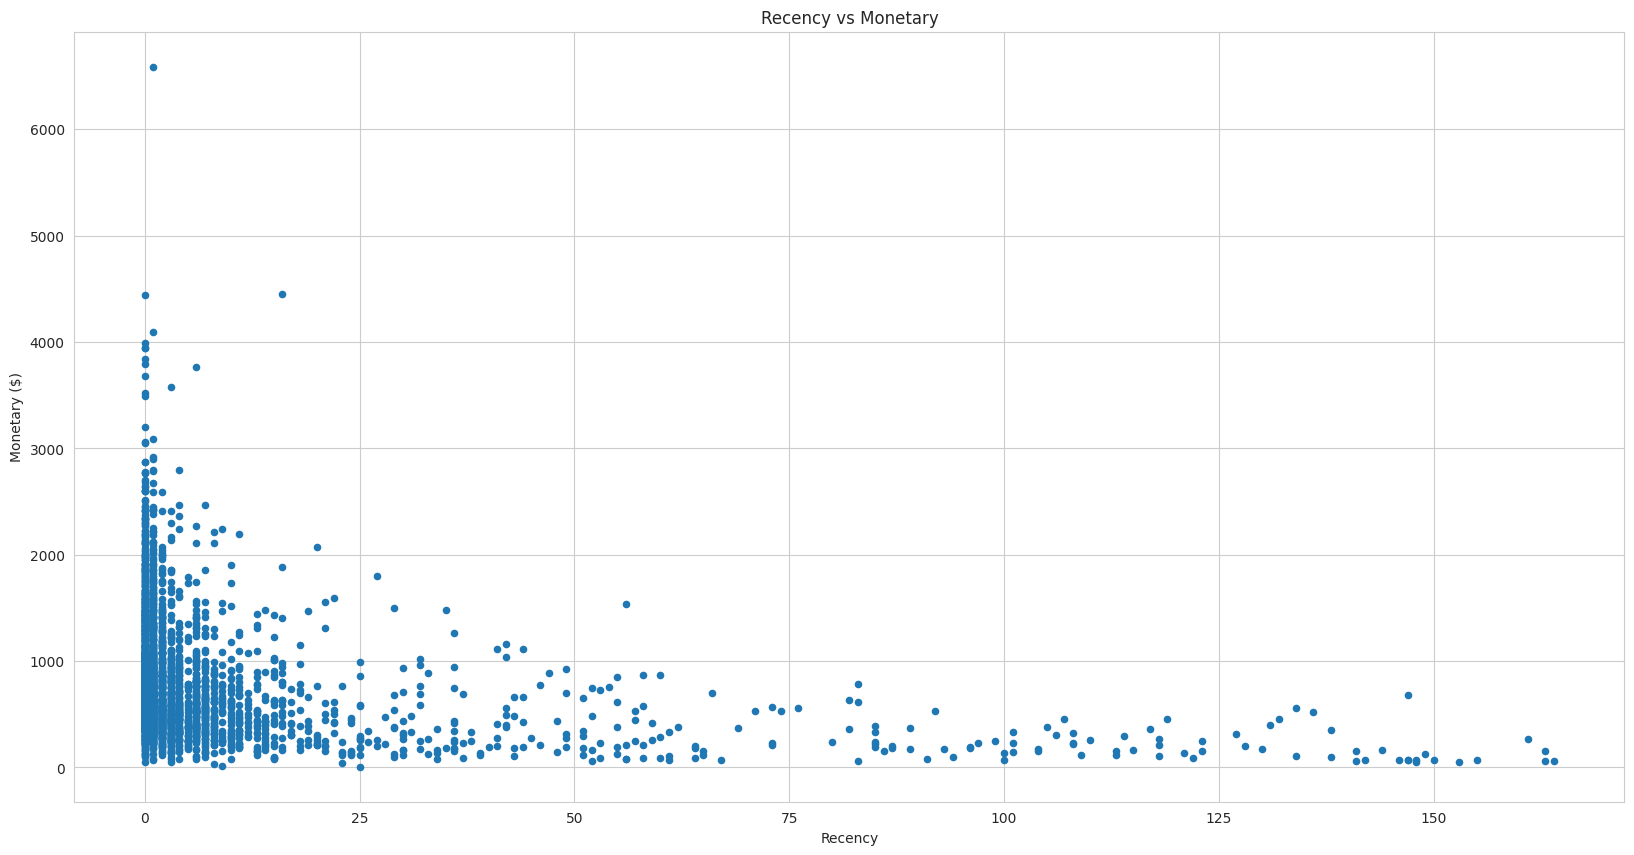

In [ ]:
#Scatter plot of Recency vs. Monetary Value
plt.figure(figsize=(5,4))
rfmTable.plot.scatter(x='Recency' , y='monetary_value')
plt.xlabel('Recency')
plt.ylabel('Monetary ($)')
plt.title('Recency vs Monetary')
plt.show()

The Recency vs. Monetary scatter plot shows that customers who made recent purchases (low recency values) tend to have higher monetary values, indicating that more frequent shoppers contribute significantly to revenue, whereas customers who haven’t purchased in a long time generally have lower spending, suggesting potential churn or inactive buyers.

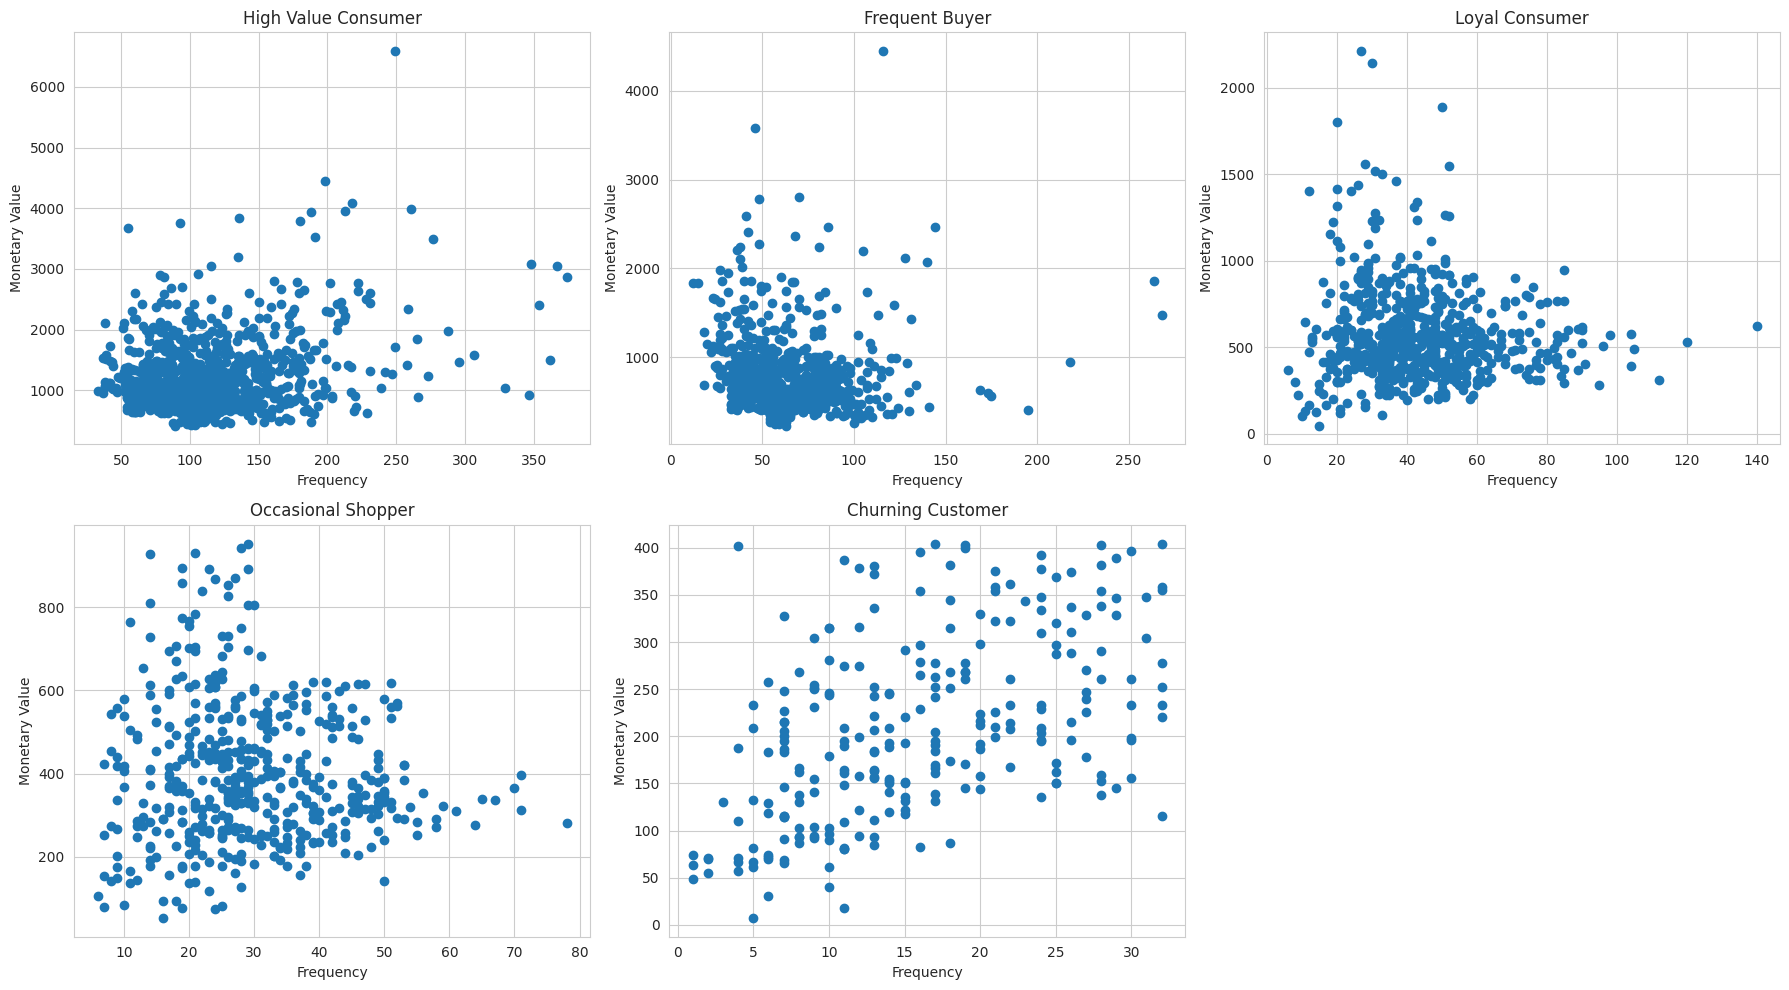

In [ ]:
#Scatter plot grid visualizing Frequency vs. Monetary Value for each RFM segment:
# Define the list of customer titles
customer_titles = ['High Value Consumer', 'Frequent Buyer', 'Loyal Consumer', 'Dormant Spender', 'Occasional Shopper', 'Churning Customer']

# Filter out customer titles that are not present in the data
existing_customer_titles = [title for title in customer_titles if title in rfmTable['customer_title'].unique()]

# Calculate the number of subplots needed based on the existing customer titles
num_subplots = len(existing_customer_titles)

# Create a subplot grid based on the number of existing customer titles
num_rows = num_subplots // 4 + (num_subplots % 4 > 0)
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(18, 5*num_rows))

# Flatten the axs array for easy indexing
axs = axs.flatten()

# Iterate over each customer segment title and plot the corresponding data
for i, title in enumerate(existing_customer_titles):
    # Extract data for the current segment
    segment_data = rfmTable[rfmTable['customer_title'] == title]

    # Plot the data
    axs[i].scatter(segment_data['Frequency'], segment_data['monetary_value'])
    axs[i].set_title(title)
    axs[i].set_xlabel('Frequency')
    axs[i].set_ylabel('Monetary Value')

# Hide any remaining empty subplots
for j in range(num_subplots, len(axs)):
    axs[j].axis('off')

plt.tight_layout()
plt.show()

The scatter plots for different customer segments show clear differences in purchasing behavior:

-High Value Consumers and Frequent Buyers have high frequency and spending, indicating strong engagement.

-Loyal Consumers and Occasional Shoppers exhibit moderate purchase frequency and spending, showing potential for increased retention efforts.

-Churning Customers have low frequency and spending, suggesting they are at risk of disengagement and may need targeted reactivation strategies.

In [ ]:
# Calculate average values for each Customer Segment, and return a size of each segment
rfm_level_agg = rfmTable.groupby('customer_title').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'monetary_value': ['mean', 'count']
}).round(1)
# Print the aggregated dataset
rfm_level_ag = pd.DataFrame(rfm_level_agg)
rfm_level_ag = rfm_level_ag.reset_index()
rfm_level_ag

customer_title Recency Frequency monetary_value      
                          mean      mean           mean count
0    Churning Customer    46.8      16.0          209.6   252
1       Frequent Buyer     2.6      64.8          800.8   741
2  High Value Consumer     0.5     116.0         1262.8   865
3       Loyal Consumer     5.9      43.6          567.3   665
4   Occasional Shopper    13.3      29.7          403.6   477

The customer segment statistics reveal distinct purchasing behaviors, with High Value Consumers (116.0 purchases, £1262.8 spend) and Frequent Buyers (64.8 purchases, £800.8 spend) showing the highest engagement and near-zero recency, indicating frequent transactions and strong retention. Loyal Consumers (43.6 purchases, £567.3 spend) and Occasional Shoppers (29.7 purchases, £403.6 spend) maintain moderate engagement, making them prime targets for loyalty initiatives. In contrast, Churning Customers (16.0 purchases, £209.6 spend, recency of 46.8) exhibit declining engagement and lower spending, signaling the need for targeted re-engagement strategies to prevent full churn.

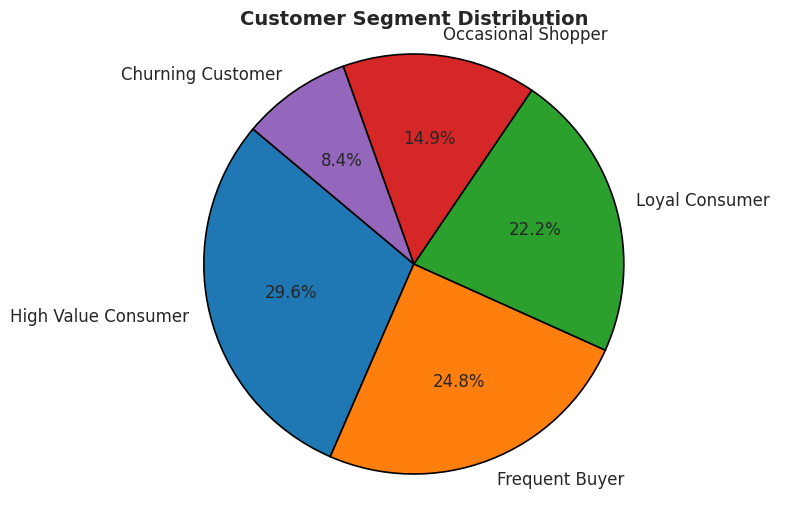

In [ ]:
# Pie chart of the Percentage Ratio of each Customer Segment
# Define customer segments and counts
customer_types = ['High Value Consumer', 'Frequent Buyer', 'Loyal Consumer', 'Occasional Shopper', 'Churning Customer']
counts = [885,741, 665, 447, 252]  # Ensure this matches the labels

# Define colors
colors = plt.cm.tab10.colors

# Create pie chart with black-bordered slices for better visibility
plt.figure(figsize=(10, 6))
plt.pie(counts, labels=customer_types, autopct='%1.1f%%', startangle=140,
        colors=colors, textprops={'fontsize': 12},
        wedgeprops={'edgecolor': 'black', 'linewidth': 1.2})  # Add black borders
# Add title
plt.title('Customer Segment Distribution', fontsize=14, fontweight='bold')
# Ensure equal aspect ratio for a circular pie chart
plt.axis('equal')
plt.show()

The Customer Segment Distribution pie chart shows that High Value Consumers (29.6%) and Frequent Buyers (24.8%) make up the largest customer groups, indicating a strong base of engaged and repeat customers. Loyal Consumers (22.2%) represent a significant segment with moderate engagement, making them prime targets for loyalty initiatives. Occasional Shoppers (14.9%) suggest opportunities for increasing purchase frequency, while Churning Customers (8.4%) highlight a segment at risk of disengagement, signaling the need for targeted re-engagement strategies to prevent full churn.

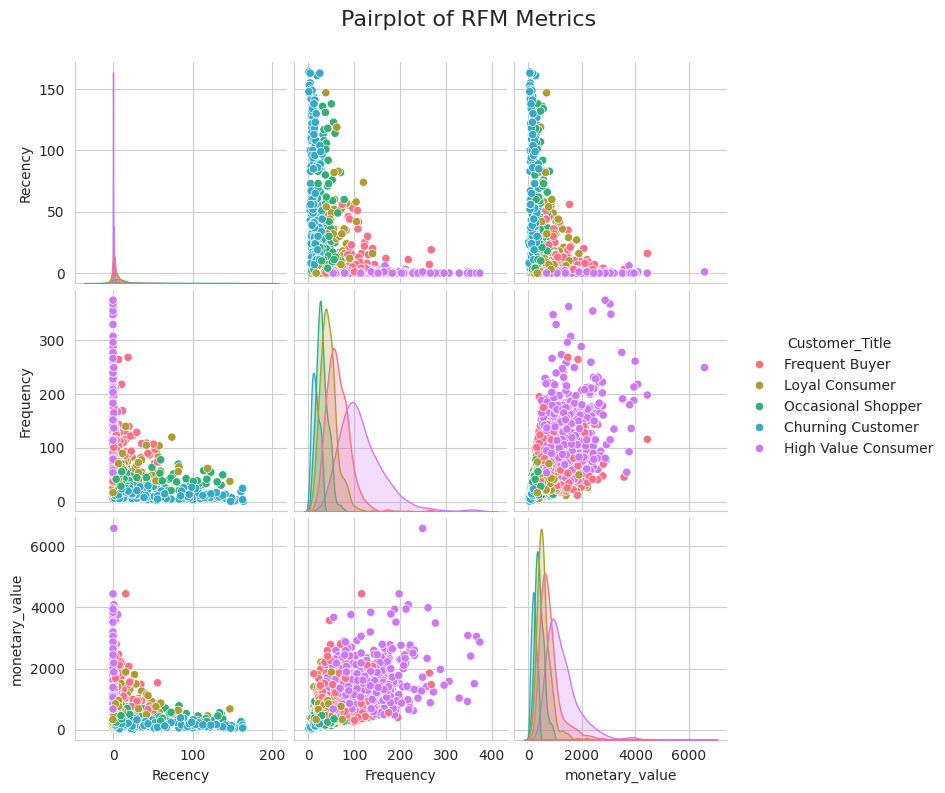

In [ ]:
#Pairplots of RFM metrics
# Ensure the correct column names are used
rfmTable['Customer_Title'] = rfmTable['customer_title']  # Ensure mapping exists

# Create a pairplot with the correct customer title labels
sns.pairplot(rfmTable[['Recency', 'Frequency', 'monetary_value', 'Customer_Title']],
             hue='Customer_Title',
             palette='husl')

plt.suptitle("Pairplot of RFM Metrics", y=1.05, fontsize=16)
plt.show()

<ipython-input-208-d32e340e16d4>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=rfmTable, x='customer_title', y='Recency', palette='muted')
<ipython-input-208-d32e340e16d4>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=rfmTable, x='customer_title', y='Frequency', palette='muted')
<ipython-input-208-d32e340e16d4>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=rfmTable, x='customer_title', y='monetary_value', palette='muted')


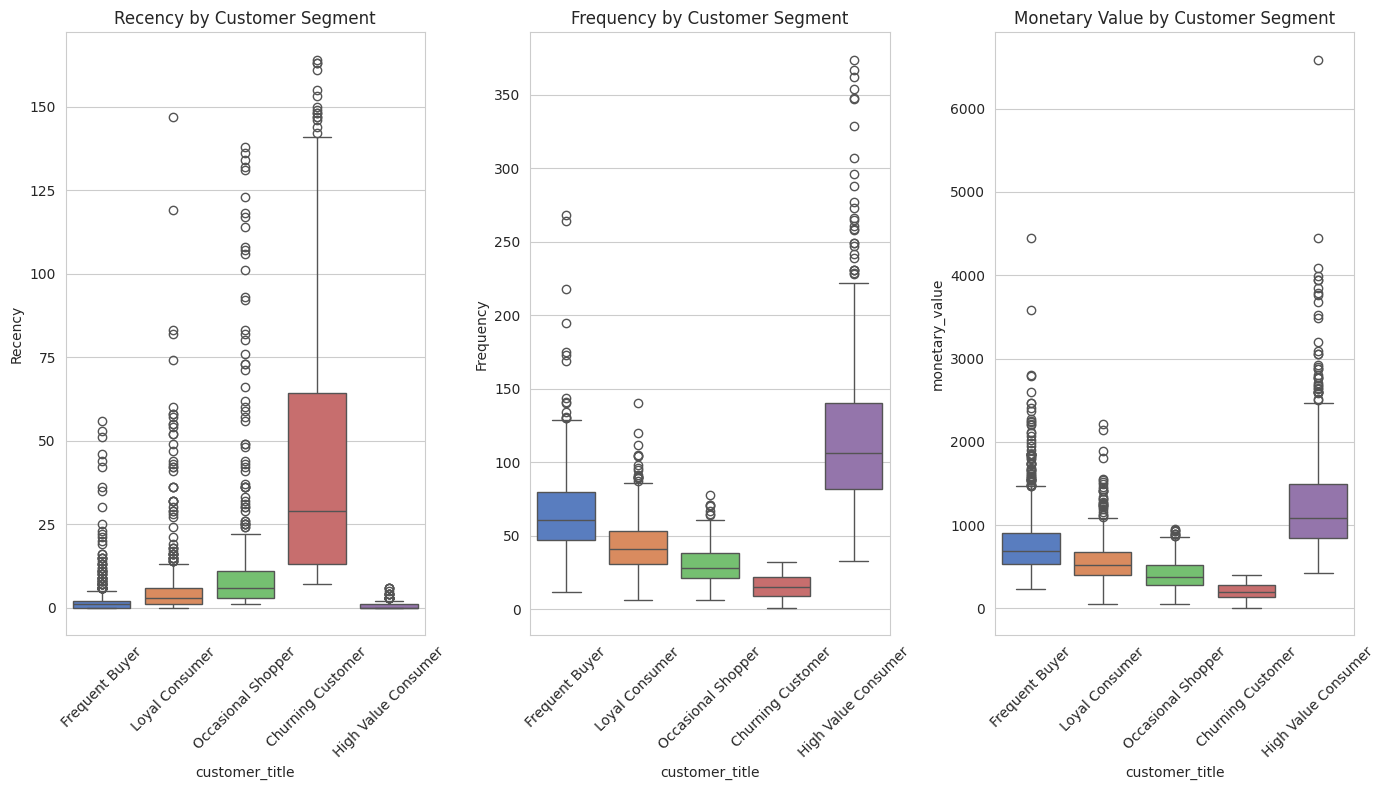

In [ ]:
#BoxPlots of RFM metrics by Customer Segment
plt.figure(figsize=(14, 8))

# Recency Boxplot
plt.subplot(1, 3, 1)
sns.boxplot(data=rfmTable, x='customer_title', y='Recency', palette='muted')
plt.title('Recency by Customer Segment')
plt.xticks(rotation=45)

# Frequency Boxplot
plt.subplot(1, 3, 2)
sns.boxplot(data=rfmTable, x='customer_title', y='Frequency', palette='muted')
plt.title('Frequency by Customer Segment')
plt.xticks(rotation=45)

# Monetary Boxplot
plt.subplot(1, 3, 3)
sns.boxplot(data=rfmTable, x='customer_title', y='monetary_value', palette='muted')
plt.title('Monetary Value by Customer Segment')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


The box plots of Recency, Frequency, and Monetary Value across customer segments show that High Value Consumers and Frequent Buyers have low recency, high frequency, and high spending, while Churning Customers exhibit high recency, low frequency, and low spending, highlighting clear behavioral differences between engaged and disengaged customers.

# Section 3
## Feature Engineering
## A) Aggregrating and Merging Tables:

In [ ]:
#STEP 1: Process `customers_df`
customers_features = customers_df[['customer_number', 'total_spend', 'total_quantity', 'baskets']].copy()

# Compute basket-level features
customers_features['average_basket_spend'] = customers_features['total_spend'] / (customers_features['baskets'] + 1)
customers_features['average_basket_quantity'] = customers_features['total_quantity'] / (customers_features['baskets'] + 1)

In [ ]:
#STEP 2: Process `baskets_df`
baskets_df['purchase_time'] = pd.to_datetime(baskets_df['purchase_time'])

# Compute num_of_unique_visits
unique_visits = baskets_df.groupby('customer_number')['purchase_time'].nunique().reset_index()
unique_visits.rename(columns={'purchase_time': 'num_of_unique_visits'}, inplace=True)

# Compute total basket categories
baskets_features = baskets_df.groupby('customer_number').agg({'basket_categories': 'sum'}).reset_index()
baskets_features.rename(columns={'basket_categories': 'total_basket_categories'}, inplace=True)

In [ ]:
#STEP 3: Process `category_spends_df`
category_features = category_spends_df[['customer_number']].copy()

# Compute total spend per category type
category_features['total_spend_essential'] = category_spends_df[essential_categories].sum(axis=1)
category_features['total_spend_non_essential'] = category_spends_df[non_essential_categories].sum(axis=1)
category_features['total_spend_occasional'] = category_spends_df[occasional_categories].sum(axis=1)

In [ ]:
#STEP 4: Process `lineitems_df`
lineitems_agg = lineitems_df.groupby('customer_number').agg({'quantity': 'sum'}).reset_index()
lineitems_agg.rename(columns={'quantity': 'total_items_purchased'}, inplace=True)

In [ ]:
#STEP 5: Compute Spend & Quantity Per Visit and Behavioral Features
# Compute category spend per visit
for category_group in ["essential", "non_essential", "occasional"]:
    category_features[f'avg_spend_{category_group}_per_visit'] = (
        category_features[f'total_spend_{category_group}'] / (unique_visits['num_of_unique_visits'] + 1)
    )

# Spend Proportion Features
category_features['essential_spend_ratio'] = category_features['total_spend_essential'] / (customers_features['total_spend'] + 1)
category_features['non_essential_spend_ratio'] = category_features['total_spend_non_essential'] / (customers_features['total_spend'] + 1)
category_features['occasional_spend_ratio'] = category_features['total_spend_occasional'] / (customers_features['total_spend'] + 1)

# Purchase Diversity Features
category_features['unique_categories_per_visit'] = baskets_features['total_basket_categories'] / (unique_visits['num_of_unique_visits'] + 1)
category_features['category_diversity_index'] = baskets_features['total_basket_categories'] / (customers_features['baskets'] + 1)
category_features['average_items_per_category'] = customers_features['total_quantity'] / (baskets_features['total_basket_categories'] + 1)

# Frequency & Recency Features
category_features['visit_frequency_ratio'] = unique_visits['num_of_unique_visits'] / (customers_features['baskets'] + 1)
category_features['purchase_recency_score'] = 1 / (rfmTable['Recency'] + 1)
category_features['spend_per_unique_visit'] = customers_features['total_spend'] / (unique_visits['num_of_unique_visits'] + 1)

In [ ]:
#STEP 6: Merge All Processed Datasets
final_features_df = (
    customers_features
    .merge(baskets_features, on='customer_number', how='left')
    .merge(category_features, on='customer_number', how='left')
    .merge(unique_visits, on='customer_number', how='left')
    .merge(lineitems_agg, on='customer_number', how='left')
)
# Set 'customer_number' as the index for the final dataframe
final_features_df.set_index('customer_number', inplace=True)

# Fill NaN values
final_features_df.fillna(0, inplace=True)

In [ ]:
final_features_df.head()

total_spend  total_quantity  baskets  average_basket_spend  \
customer_number                                                               
4749                  631.12             260      220              2.855747   
4757                  452.42             333      248              1.816948   
144                   261.16             303      226              1.150485   
572                   638.79             346      285              2.233531   
669                   561.42             324      285              1.963007   

                 average_basket_quantity  total_basket_categories  \
customer_number                                                     
4749                            1.176471                      177   
4757                            1.337349                      112   
144                             1.334802                      138   
572                             1.209790                      164   
669                             1.132867                      182   

                 total_spend_essential  total_spend_non_essential  \
customer_number                                                     
4749                             92.74                     185.19   
4757                            287.07                     101.95   
144                             144.08                      52.72   
572                              73.92                     113.46   
669                              59.65                     419.21   

                 total_spend_occasional  avg_spend_essential_per_visit  ...  \
customer_number                                                         ...   
4749                             338.81                       1.495806  ...   
4757                              54.80                      10.252500  ...   
144                               54.65                       1.549247  ...   
572                              394.74                       1.997838  ...   
669                               64.68                       1.807576  ...   

                 non_essential_spend_ratio  occasional_spend_ratio  \
customer_number                                                      
4749                              0.307563                0.562695   
4757                              0.150273                0.080775   
144                               0.068476                0.070983   
572                               0.114978                0.400020   
669                               0.215086                0.033186   

                 unique_categories_per_visit  category_diversity_index  \
customer_number                                                          
4749                                4.435484                  0.932203   
4757                                4.964286                  0.298283   
144                                 3.440860                  0.494590   
572                                 3.972973                  0.334091   
669                                 3.545455                  0.074522   

                 average_items_per_category  visit_frequency_ratio  \
customer_number                                                      
4749                               1.221014               0.206780   
4757                               4.464286               0.057940   
144                                2.202492               0.142195   
572                                3.391892               0.081818   
669                               16.720339               0.020382   

                 purchase_recency_score  spend_per_unique_visit  \
customer_number                                                   
4749                           0.000000                9.695484   
4757                           0.000000               24.193929   
144                            0.333333                8.267742   
572                            0.000000               26.643243   
669                            0.50000

## B) Correleation Matrix Analysis:

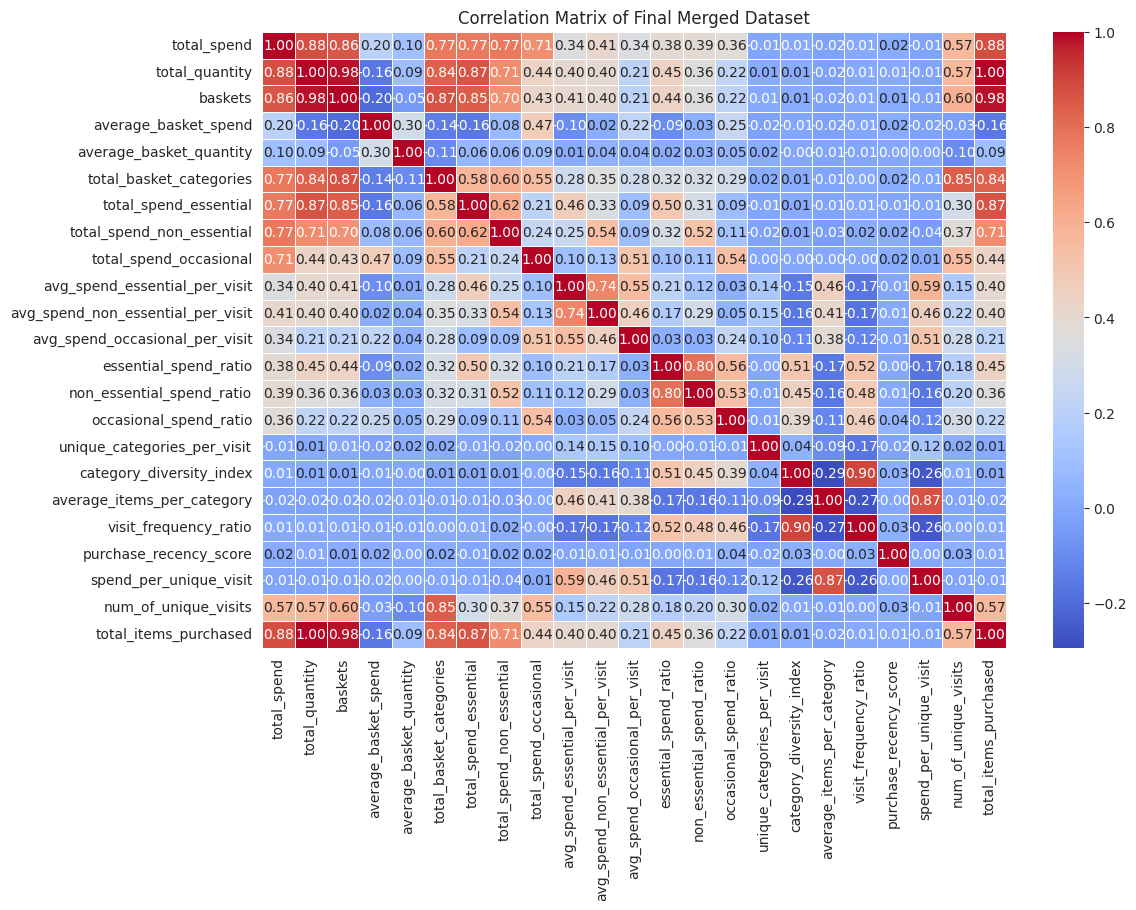

In [ ]:
# Compute the correlation matrix
corr_matrix = final_features_df.corr(numeric_only=True)

# Set up the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Add title
plt.title('Correlation Matrix of Final Merged Dataset')

# Show the plot
plt.show()

In [ ]:
#Features To Drop after Analysing Correleation Matrix:
features_to_drop = [
    "total_spend_occasional", "occasional_spend_ratio", "category_diversity_index",
    "purchase_recency_score", "average_basket_quantity", "unique_categories_per_visit",
    "essential_spend_ratio", "non_essential_spend_ratio", "total_spend_non_essential", "num_of_unique_visits",
    "total_spend_essential", "total_basket_categories",'baskets','total_items_purchased','average_basket_spend'
]

final_features= final_features_df.drop(columns=features_to_drop)
final_features.columns

Index(['total_spend', 'total_quantity', 'avg_spend_essential_per_visit',
       'avg_spend_non_essential_per_visit', 'avg_spend_occasional_per_visit',
       'average_items_per_category', 'visit_frequency_ratio',
       'spend_per_unique_visit'],
      dtype='object')

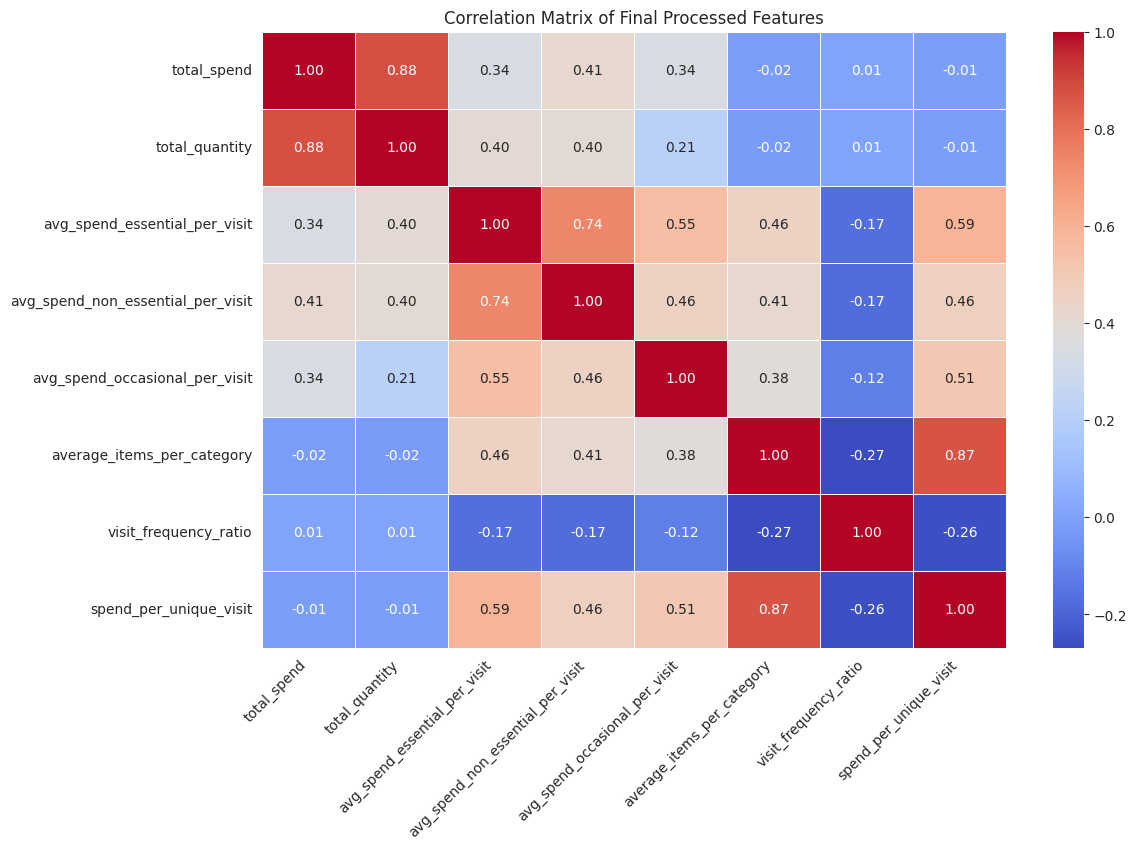

In [ ]:
# Compute the correlation matrix
corr_matrix = final_features.corr(numeric_only=True)

# Set up the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Adjust plot aesthetics
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.title('Correlation Matrix of Final Processed Features')

# Display the plot
plt.show()


In [ ]:
customers_features_merged = final_features

In [ ]:
customers_features_merged.isna().sum()

total_spend                          0
total_quantity                       0
avg_spend_essential_per_visit        0
avg_spend_non_essential_per_visit    0
avg_spend_occasional_per_visit       0
average_items_per_category           0
visit_frequency_ratio                0
spend_per_unique_visit               0
dtype: int64

## C) Outlier Detection:

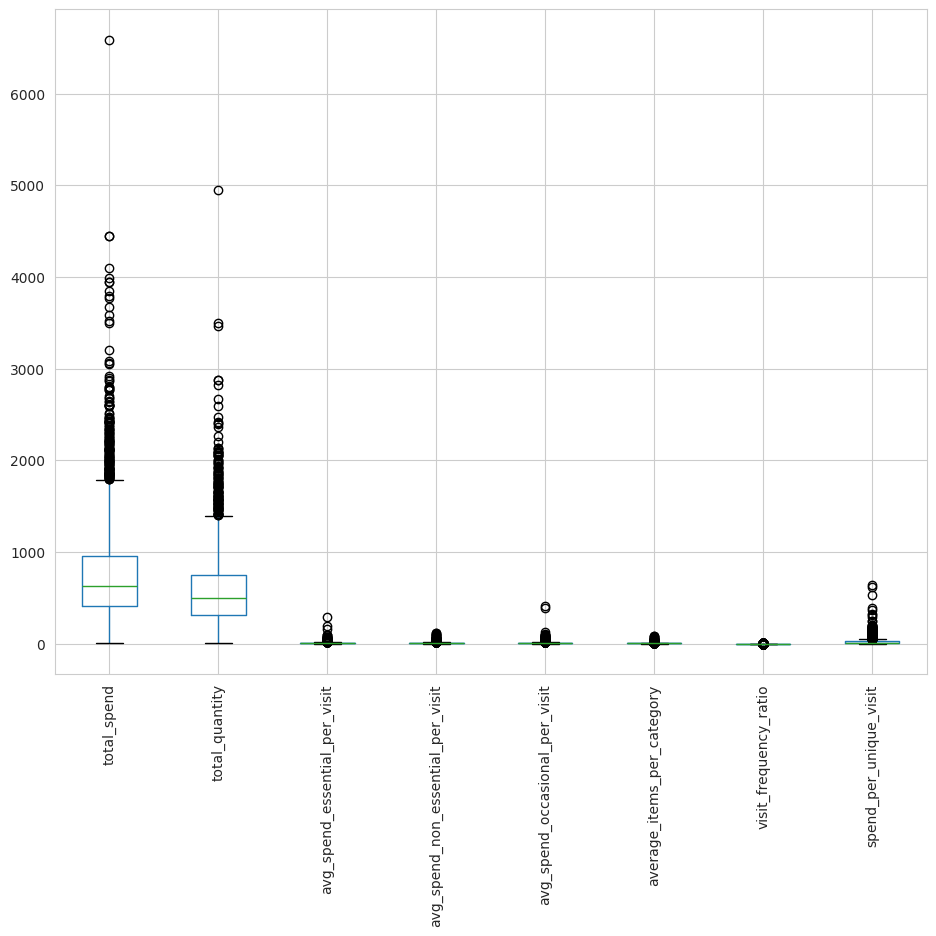

In [ ]:
# Create a new figure with specified size
fig, ax = plt.subplots(figsize=(10.0, 10.0))

# Create a boxplot with default blue color
customers_features_merged.boxplot(ax=ax)

# Rotate the x-axis labels by 90 degrees
plt.xticks(rotation=90)

# Adjust layout
plt.tight_layout(pad=3.0, w_pad=0.5, h_pad=1.0)

# Show the plot
plt.show()

The box plot reveals significant outliers in total spend, indicating a small group of high-spending customers or anomalies, while other features show milder outliers in visit frequency and spending behaviors. Applying log transformation and standardization can help normalize these variations for more effective clustering.

In [ ]:
# Calculate the IQR for each feature
Q1 = customers_features_merged.quantile(0.25)
Q3 = customers_features_merged.quantile(0.75)
IQR = Q3 - Q1

# Determine outliers using IQR method
outliers = ((customers_features_merged < (Q1 - 1.5 * IQR)) | (customers_features_merged > (Q3 + 1.5 * IQR))).sum()

# Display the count of outliers for each feature
print("Number of outliers in each feature:")
print(outliers)

Number of outliers in each feature:
total_spend                          167
total_quantity                       130
avg_spend_essential_per_visit        241
avg_spend_non_essential_per_visit    251
avg_spend_occasional_per_visit       316
average_items_per_category           252
visit_frequency_ratio                266
spend_per_unique_visit               248
dtype: int64


In [ ]:
# Identify numeric columns only
numeric_cols = final_features.select_dtypes(include=['int64', 'float64']).columns

# Replacing 0 values with 1 to avoid log(0) errors
final_features[numeric_cols] = final_features[numeric_cols].replace(0, 1)

# Applying natural log transformation only to numeric columns
log_transformed_features = final_features.copy()
log_transformed_features[numeric_cols] = np.log(final_features[numeric_cols])

# Display the transformed dataset
log_transformed_features.head()

total_spend  total_quantity  avg_spend_essential_per_visit  \
customer_number                                                               
4749                6.447496        5.560682                       0.402665   
4757                6.114611        5.808142                       2.327522   
144                 5.565133        5.713733                       0.437769   
572                 6.459576        5.846439                       0.692066   
669                 6.330469        5.780744                       0.591987   

                 avg_spend_non_essential_per_visit  \
customer_number                                      
4749                                      1.094248   
4757                                      1.292278   
144                                      -0.567605   
572                                       1.120532   
669                                       2.541864   

                 avg_spend_occasional_per_visit  average_items_per_category  \
customer_number                                                               
4749                                   1.698305                    0.199682   
4757                                   0.671486                    1.496109   
144                                   -0.531650                    0.789590   
572                                    2.367309                    1.221388   
669                                    0.672944                    2.816626   

                 visit_frequency_ratio  spend_per_unique_visit  
customer_number                                                 
4749                         -1.576101                2.271660  
4757                         -2.848349                3.186102  
144                          -1.950558                2.112361  
572                          -2.503256                3.282536  
669                          -3.893095                4.078066

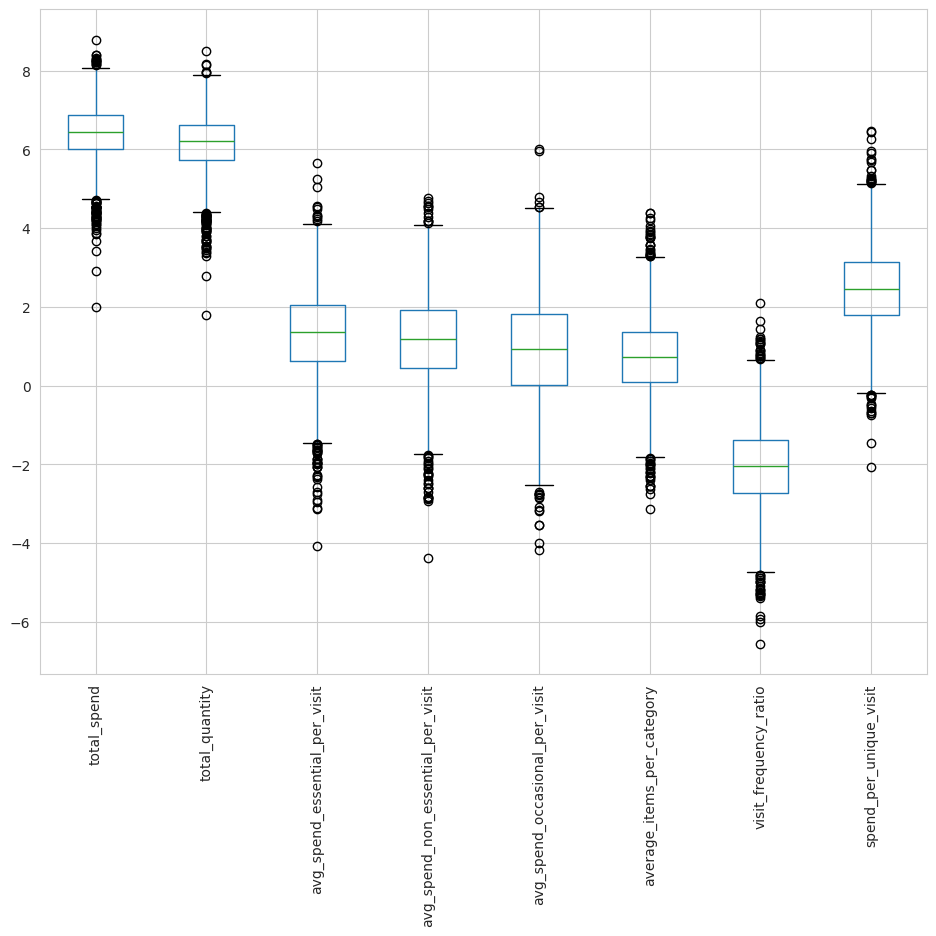

In [ ]:
# Create a new figure with specified size
fig, ax = plt.subplots(figsize=(10.0, 10.0))

# Create a boxplot with default blue color
log_transformed_features.boxplot(ax=ax)

# Rotate the x-axis labels by 90 degrees
plt.xticks(rotation=90)

# Adjust layout
plt.tight_layout(pad=3.0, w_pad=0.5, h_pad=1.0)

# Show the plot
plt.show()

After applying log transformation, the box plot shows a more balanced distribution across features, reducing extreme outliers and making the data more comparable across different scales. However, some features, like total spend and visit frequency ratio, still exhibit outliers, suggesting that additional standardization may further improve data consistency for clustering.

## D) Standardization:

        total_spend  total_quantity  avg_spend_essential_per_visit  \
count  3.000000e+03    3.000000e+03                   3.000000e+03   
mean   1.847411e-16    4.215887e-16                  -1.172396e-16   
std    1.000167e+00    1.000167e+00                   1.000167e+00   
min   -6.298982e+00   -6.090594e+00                  -4.822547e+00   
25%   -5.835455e-01   -5.782807e-01                  -6.059702e-01   
50%    3.407001e-02    8.707152e-02                   4.626768e-02   
75%    6.356568e-01    6.579949e-01                   6.503331e-01   
max    3.376603e+00    3.310276e+00                   3.893586e+00   

       avg_spend_non_essential_per_visit  avg_spend_occasional_per_visit  \
count                       3.000000e+03                    3.000000e+03   
mean                       -7.934394e-17                   -2.368476e-17   
std                         1.000167e+00                    1.000167e+00   
min                        -4.842886e+00                   -3.819

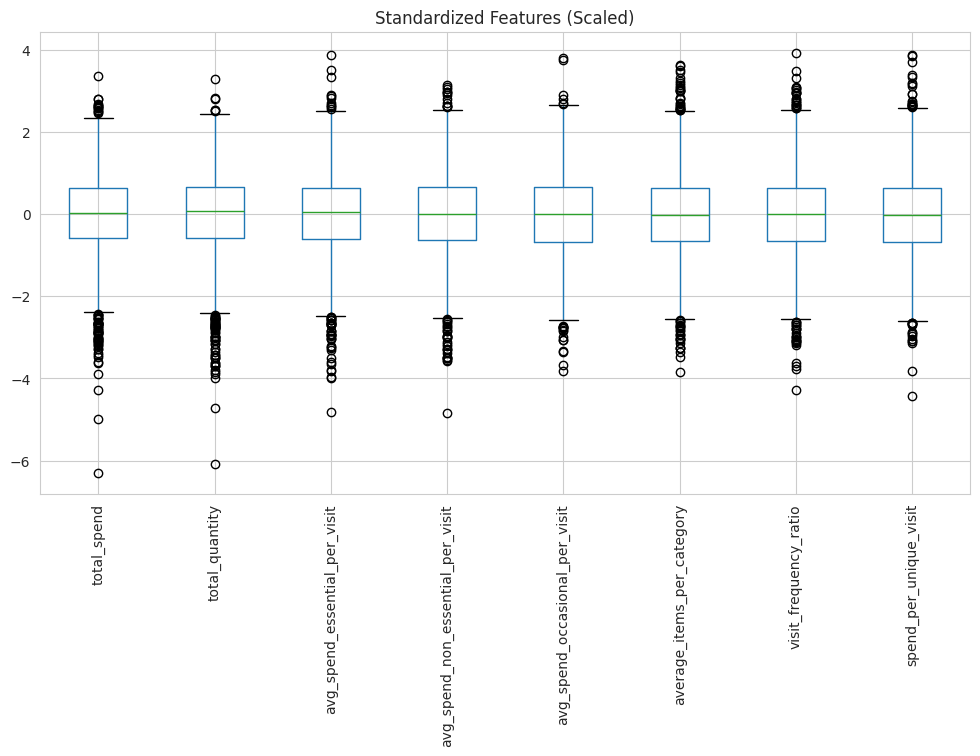

In [ ]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Apply standardization to the log-transformed data
standardized_features = scaler.fit_transform(log_transformed_features)

# Convert back to DataFrame for better readability
standardized_df = pd.DataFrame(standardized_features, columns=log_transformed_features.columns, index=log_transformed_features.index)

# Display summary statistics to verify standardization
print(standardized_df.describe())

# Visualize the standardized data using boxplot
plt.figure(figsize=(12, 6))
standardized_df.boxplot()
plt.xticks(rotation=90)
plt.title("Standardized Features (Scaled)")
plt.show()

After standardization, the features are now centered around zero with comparable scales, ensuring that no single feature dominates clustering. While outliers still exist, they are now more proportionate across features, making the data more suitable for distance-based clustering methods like K-Means.

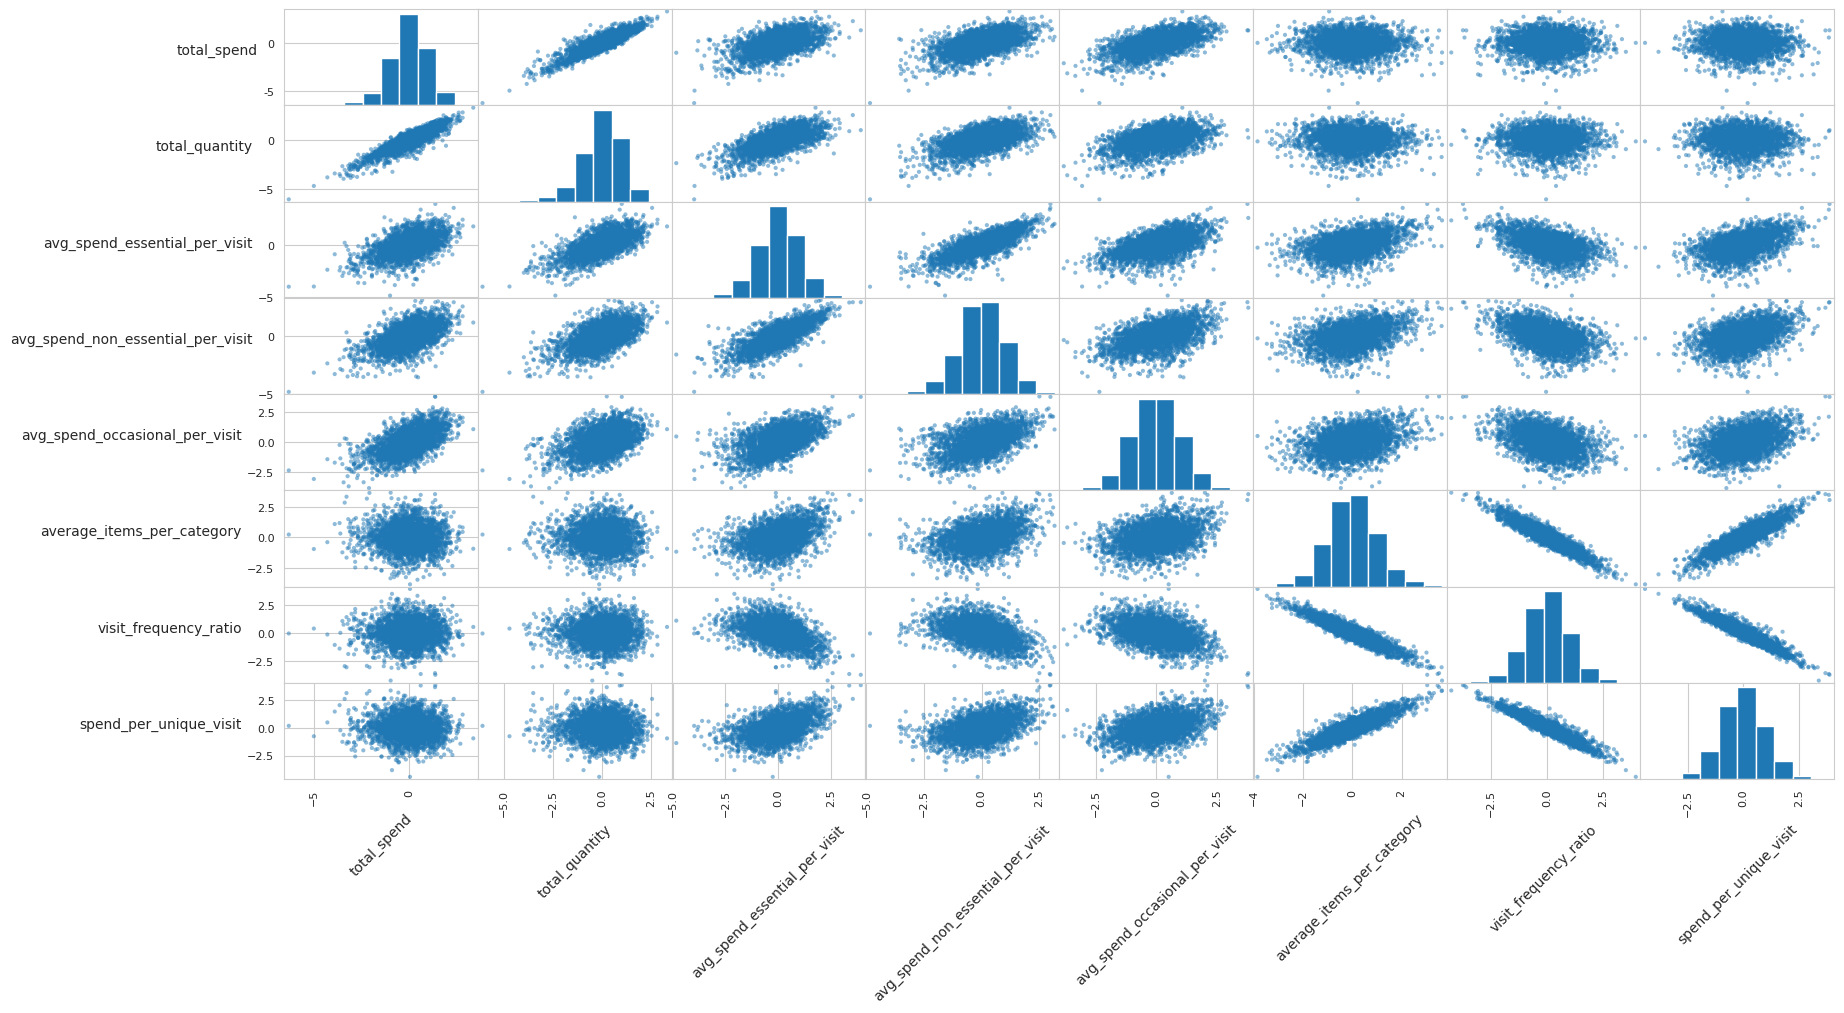

In [ ]:
# Pairwise scatter plots
scatter = pd.plotting.scatter_matrix(standardized_df, figsize = (20,10))
for ax in scatter.flatten():
    ax.xaxis.label.set_rotation(45)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')  # Horizontal alignment

## E) Implementing PCA for Dimensionality Reduction:
We are now applying Principal Component Analysis (PCA) to reduce the dimensionality of our dataset while retaining the most important variance in the data. By transforming correlated features into a smaller set of uncorrelated principal components, we enhance computational efficiency and improve clustering performance. This step ensures that our segmentation is driven by the most informative and meaningful features.

In [ ]:
import sklearn
from sklearn.decomposition import PCA
#-- Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components=6)
pca.fit(standardized_df)

PCA(n_components=6)

             total_spend  total_quantity  avg_spend_essential_per_visit  \
Dimension 1     0.278367        0.280368                       0.415357   
Dimension 2     0.481118        0.473082                       0.146860   
Dimension 3     0.181154       -0.138519                      -0.380205   
Dimension 4    -0.346937       -0.485782                       0.214888   
Dimension 5    -0.309009        0.102964                       0.707503   
Dimension 6     0.043211        0.140227                      -0.183940   

             avg_spend_non_essential_per_visit  \
Dimension 1                           0.400254   
Dimension 2                           0.148844   
Dimension 3                          -0.379900   
Dimension 4                           0.552580   
Dimension 5                          -0.585619   
Dimension 6                          -0.022325   

             avg_spend_occasional_per_visit  average_items_per_category  \
Dimension 1                        0.350239     

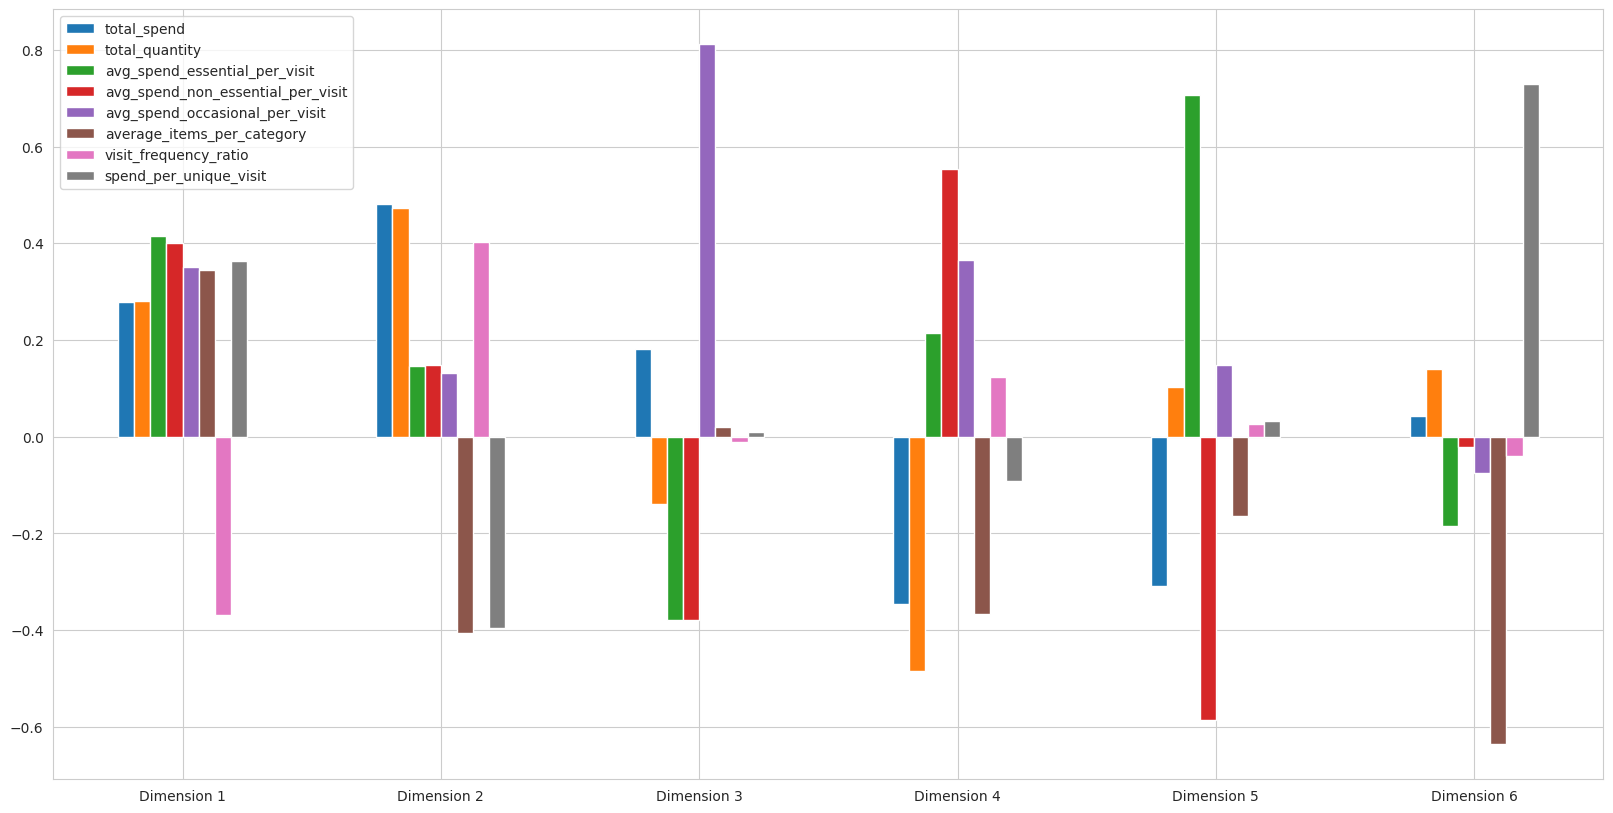

In [ ]:
pca_results= pd.DataFrame(data= pca.fit(standardized_df).components_, columns= final_features.columns, index= ['Dimension 1', 'Dimension 2', 'Dimension 3', 'Dimension 4', 'Dimension 5', 'Dimension 6'])
print(pca_results)

#-- Generate a PCA results bar plot
ax = pca_results.plot.bar(figsize=(20, 10))
ax.tick_params(axis='x', rotation=0)

#-- Print out the explained variance of each component, as well as cumulatively
explained_variance = pca.explained_variance_ratio_
print('Explained variance of each component:', explained_variance)
print('Cumulative explained variance:', np.cumsum(explained_variance))

After the analysis, two components were chosen as they explain the maximum variability 82.8% (52.3% + 30.5%) in the dataset while reducing dimensionality. This selection ensures that key patterns and relationships among features are retained for effective interpretation.Therefore we'll proceed with 2.

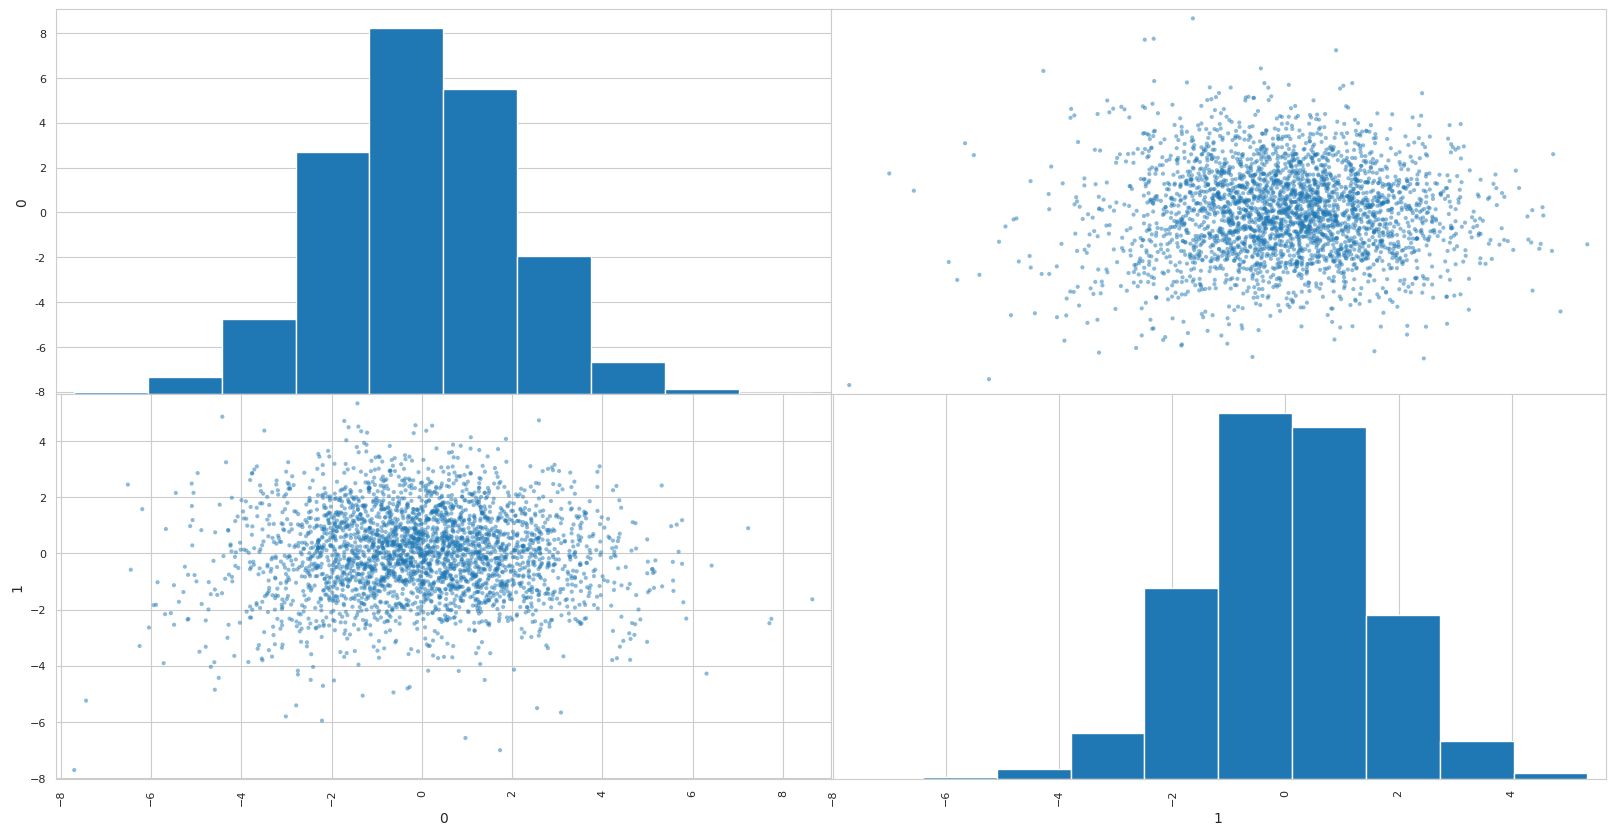

In [ ]:
# Apply PCA by fitting the good data with only two dimensions
# Instantiate
pca = PCA(n_components=2)
pca.fit(standardized_df)

# TO DO: Transform the good data using the PCA fit above
reduced_data = pca.transform(standardized_df)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data)
scatter = pd.plotting.scatter_matrix(reduced_data, figsize = (20,10))

# Section 4
# Clustering and Segmentation
## A)Silhoutte Scores to Evaluates Optimal Clusters.:

In [ ]:
# Create range of clusters
range_n_clusters = list(range(2, 11))
silhouette_scores = []
print(range_n_clusters)

# Loop through clusters
for n_clusters in range_n_clusters:
    # TO DO: Apply your clustering algorithm of choice to the reduced data
    clusterer = KMeans(n_clusters = n_clusters).fit(reduced_data)

    # TO DO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)

    # TO DO: Find the cluster centers
    centers = clusterer.cluster_centers_

    # TO DO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data, preds, metric='euclidean')
    silhouette_scores.append(score)
    print("For n_clusters = {}. The average silhouette_score is : {})".format(n_clusters, score))

[2, 3, 4, 5, 6, 7, 8, 9, 10]
For n_clusters = 2. The average silhouette_score is : 0.3514823735359503)
For n_clusters = 3. The average silhouette_score is : 0.3307678239944124)
For n_clusters = 4. The average silhouette_score is : 0.3116898655328527)
For n_clusters = 5. The average silhouette_score is : 0.3171820980303066)
For n_clusters = 6. The average silhouette_score is : 0.30219130404024264)
For n_clusters = 7. The average silhouette_score is : 0.31624060662958464)
For n_clusters = 8. The average silhouette_score is : 0.3190259332359811)
For n_clusters = 9. The average silhouette_score is : 0.3165717137618288)
For n_clusters = 10. The average silhouette_score is : 0.3154105373248302)


## B)Elbow Method for Ideal Number of Clusters:

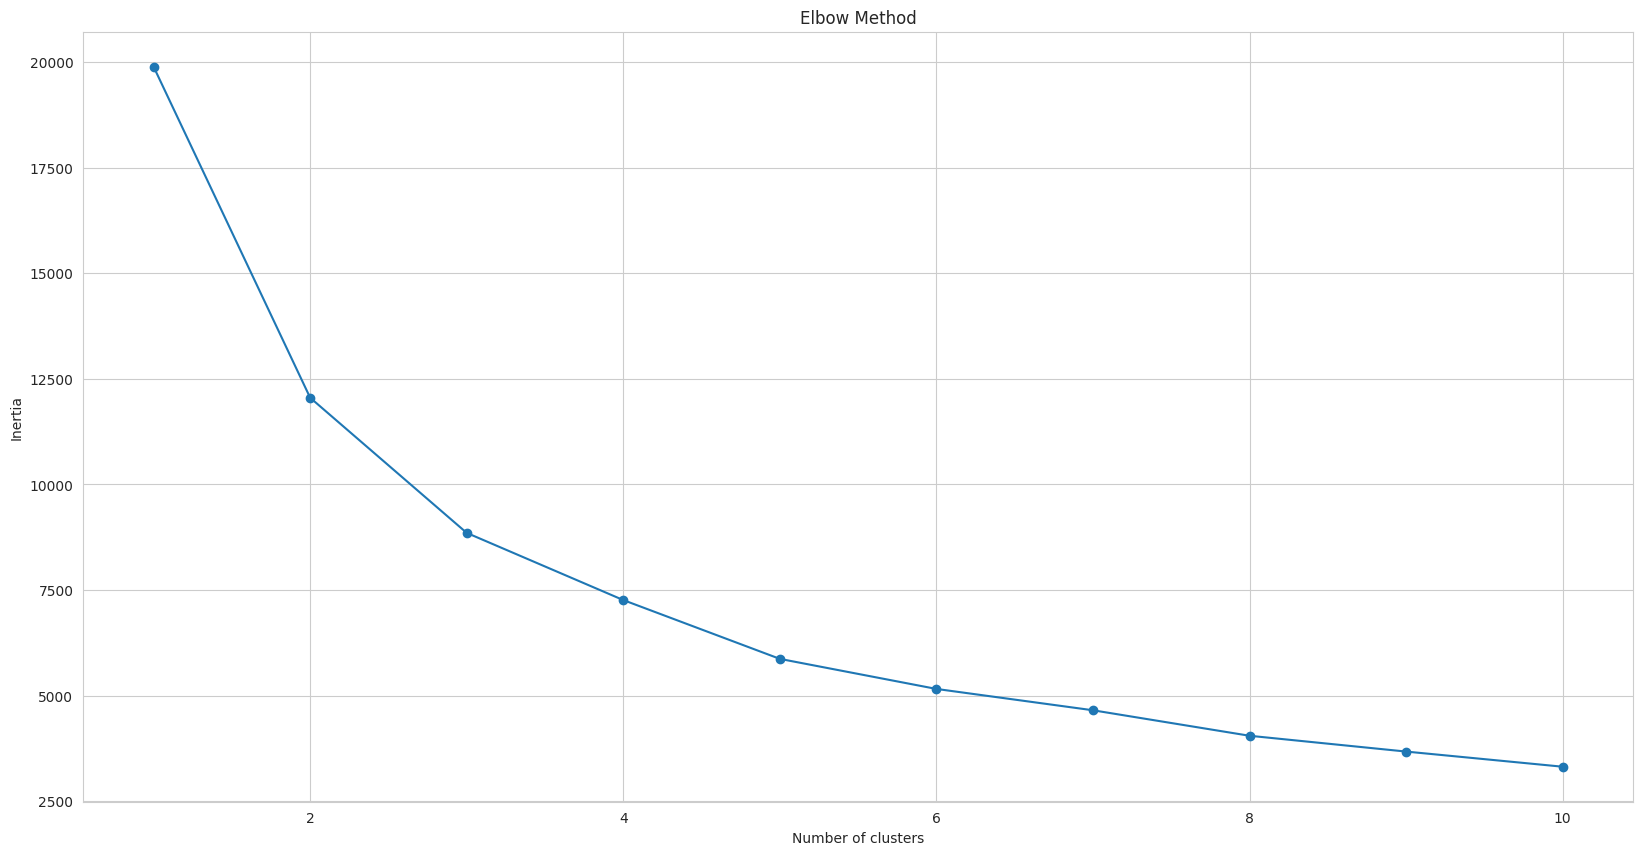

In [ ]:
inertia = []
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(reduced_data)
    inertia.append(kmeans.inertia_)

# Plotting the elbow curve
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

## C) K-Means Clustering for Segmentation:

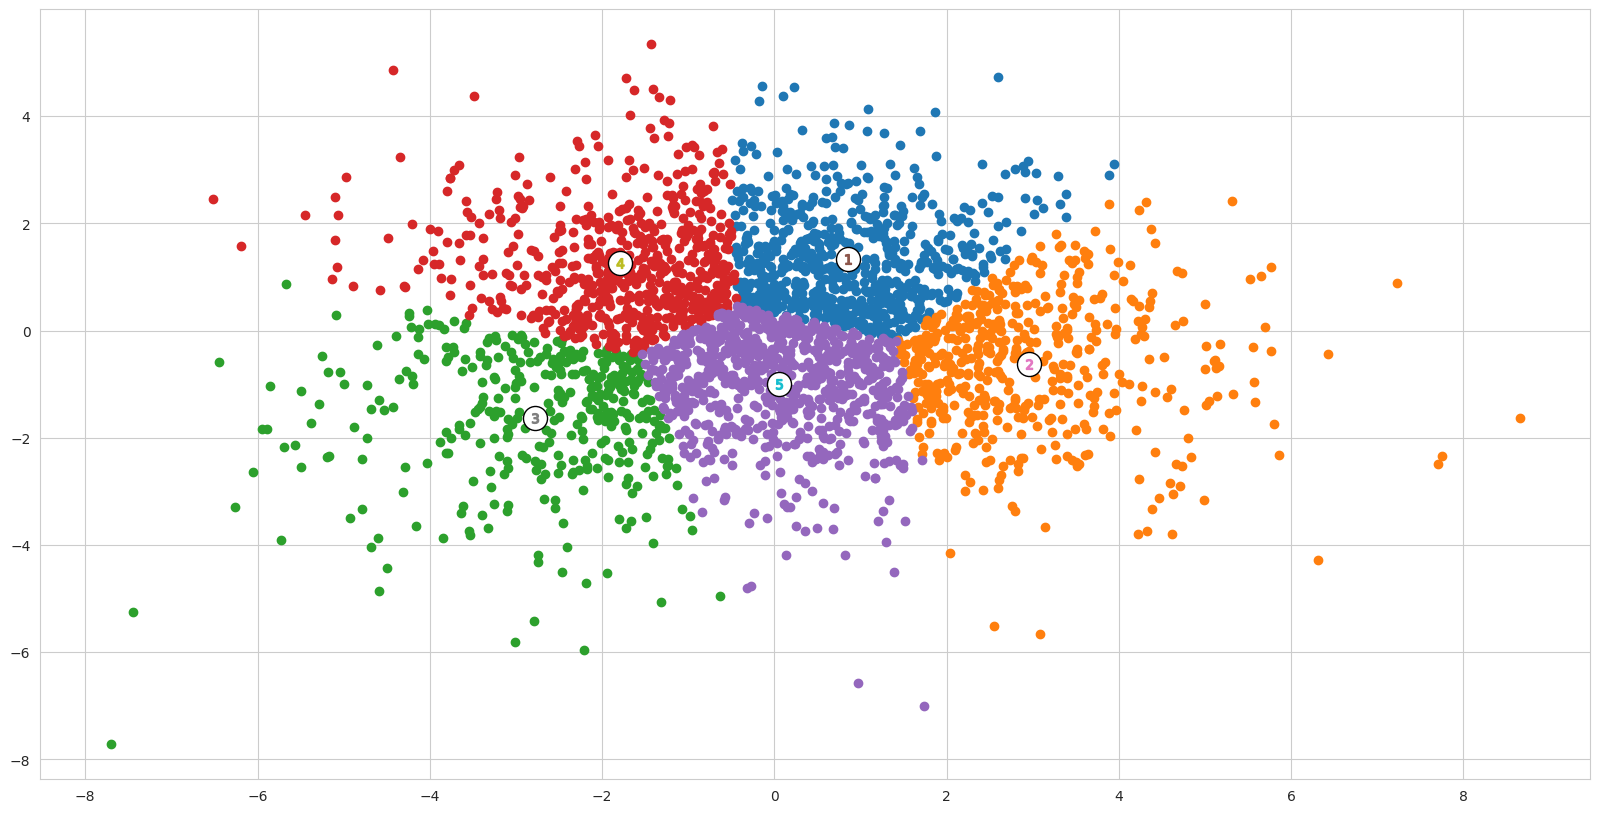

In [ ]:
import random
# Set a fixed random seed
random_seed = 42
np.random.seed(random_seed)
random.seed(random_seed)

#-- Our final clustering solution
clusterer = KMeans(n_clusters=5).fit(reduced_data)
preds = clusterer.predict(reduced_data)
centres = clusterer.cluster_centers_

# Add 1 to cluster labels to start numbering from 1
preds += 1

#-- Put the predictions into a pandas dataframe format
assignments = pd.DataFrame(preds, columns = ['Cluster'])

#-- Put the predictions into a pandas dataframe format
plot_data = pd.concat([assignments, reduced_data], axis = 1)

#-- Color the points based on assigned cluster (n.b scatter will do this for us automatically)
plt.rcParams['figure.figsize'] = (20,10)

for i, c in plot_data.groupby('Cluster'):
    plt.scatter(c[0], c[1])

#-- Plot where the cluster centers are
for i, c in enumerate(centres):
    plt.scatter(x = c[0], y = c[1], color = 'white', edgecolors = 'black', marker = 'o', s=300);
    plt.scatter(x = c[0], y = c[1], marker='${}$'.format(i+1), alpha = 1, s=50);

## D) Reversing Transformations of each Segment:

In [ ]:
# Step 1: Reverse PCA transformation (back to standardized space)
log_centres = pca.inverse_transform(centres)

# Step 2: Reverse standardization (back to log-transformed space)
original_scaled = scaler.inverse_transform(log_centres)  # Undo standardization

# Step 3: Reverse log transformation (back to actual scale)
true_centres = np.exp(original_scaled)  # Undo log transformation

#-- Display the true centres
segments = ['Segment {}'.format(i+1) for i in range(0, len(centres))]
true_centres = pd.DataFrame(np.round(true_centres), columns=customers_features_merged.columns)
true_centres.index = segments
true_centres

total_spend  total_quantity  avg_spend_essential_per_visit  \
Segment 1       1135.0           865.0                            7.0   
Segment 2        887.0           683.0                           13.0   
Segment 3        205.0           154.0                            1.0   
Segment 4        659.0           496.0                            2.0   
Segment 5        441.0           336.0                            3.0   

           avg_spend_non_essential_per_visit  avg_spend_occasional_per_visit  \
Segment 1                                6.0                             5.0   
Segment 2                               11.0                             9.0   
Segment 3                                1.0                             1.0   
Segment 4                                2.0                             1.0   
Segment 5                                3.0                             2.0   

           average_items_per_category  visit_frequency_ratio  \
Segment 1                         2.0                    0.0   
Segment 2                         7.0                    0.0   
Segment 3                         2.0                    0.0   
Segment 4                         1.0                    0.0   
Segment 5                         3.0                    0.0   

           spend_per_unique_visit  
Segment 1                    10.0  
Segment 2                    46.0  
Segment 3                     8.0  
Segment 4                     4.0  
Segment 5                    18.0

In [ ]:
customers_features_merged.reset_index(inplace=True)

## E) Descriptive Statistics of Each Segment:

In [ ]:
#-- Join the segment assignments to the original data
final_assigments = pd.concat([assignments, customers_features_merged], axis = 1)

#-- Create a loop that describes summary statistics for each segment
for c, d in final_assigments.groupby('Cluster'):
    print("Segment", c)
    display(d.describe())

Segment 1


Cluster  customer_number  total_spend  total_quantity  \
count    696.0       696.000000   696.000000      696.000000   
mean       1.0      7759.216954  1276.652500      949.370690   
std        0.0      4116.400215   626.626238      451.162024   
min        1.0        71.000000   443.400000      256.000000   
25%        1.0      4489.750000   859.705000      663.000000   
50%        1.0      8179.500000  1109.900000      846.000000   
75%        1.0     10952.000000  1486.990000     1126.250000   
max        1.0     16294.000000  6588.650000     4949.000000   

       avg_spend_essential_per_visit  avg_spend_non_essential_per_visit  \
count                     696.000000                         696.000000   
mean                        8.073583                           7.362867   
std                         6.046166                           6.121834   
min                         0.544863                           0.605510   
25%                         4.289162                           3.596033   
50%                         6.521726                           5.832260   
75%                         9.896175                           9.176014   
max                        54.189000                          56.457368   

       avg_spend_occasional_per_visit  average_items_per_category  \
count                      696.000000                  696.000000   
mean                         7.579449                    1.883015   
std                          8.225839                    1.019185   
min                          0.451356                    0.200000   
25%                          2.595228                    1.152749   
50%                          4.613122                    1.653900   
75%                          9.723616                    2.423494   
max                         64.800606                    6.659794   

       visit_frequency_ratio  spend_per_unique_visit  
count             696.000000              696.000000  
mean                0.186575               11.059963  
std                 0.124972                5.762857  
min                 0.050463                1.333226  
25%                 0.106270                6.845776  
50%                 0.155394                9.935035  
75%                 0.222858               14.525321  
max                 1.142857               37.844821

Segment 2


Cluster  customer_number  total_spend  total_quantity  \
count    509.0       509.000000   509.000000      509.000000   
mean       2.0      7699.587426   996.649214      755.269155   
std        0.0      4445.081679   565.750029      409.280207   
min        2.0        45.000000   129.770000      125.000000   
25%        2.0      4047.000000   617.890000      490.000000   
50%        2.0      7386.000000   856.820000      671.000000   
75%        2.0     11280.000000  1188.900000      912.000000   
max        2.0     16295.000000  4448.190000     3499.000000   

       avg_spend_essential_per_visit  avg_spend_non_essential_per_visit  \
count                     509.000000                         509.000000   
mean                       18.423316                          15.947140   
std                        20.676527                          15.466468   
min                         1.741364                           0.955000   
25%                         8.293889                           7.127813   
50%                        13.313103                          11.380000   
75%                        22.217576                          19.063396   
max                       287.110000                         117.911667   

       avg_spend_occasional_per_visit  average_items_per_category  \
count                      509.000000                  509.000000   
mean                        17.047501                    9.837820   
std                         29.780830                    9.795466   
min                          0.413636                    1.807175   
25%                          4.292353                    4.607843   
50%                          8.669844                    6.673575   
75%                         19.203125                   10.453782   
max                        405.480000                   80.800000   

       visit_frequency_ratio  spend_per_unique_visit  
count             509.000000              509.000000  
mean                0.038303               58.585874  
std                 0.020012               61.594805  
min                 0.001425               13.637692  
25%                 0.022686               28.018235  
50%                 0.036232               41.263500  
75%                 0.052632               66.407931  
max                 0.126263              640.870000

Segment 3


Cluster  customer_number  total_spend  total_quantity  \
count    370.0       370.000000   370.000000      370.000000   
mean       3.0      9379.635135   238.702189      173.070270   
std        0.0      5187.874069   123.960891       85.682185   
min        3.0        68.000000     7.280000        6.000000   
25%        3.0      4366.250000   154.585000      105.250000   
50%        3.0     11757.000000   227.975000      162.000000   
75%        3.0     13949.000000   292.600000      232.000000   
max        3.0     16301.000000   800.250000      566.000000   

       avg_spend_essential_per_visit  avg_spend_non_essential_per_visit  \
count                     370.000000                         370.000000   
mean                        1.015392                           0.943681   
std                         0.760285                           0.728252   
min                         0.017069                           0.012500   
25%                         0.493101                           0.419376   
50%                         0.865700                           0.745976   
75%                         1.347453                           1.325516   
max                         5.463529                           4.566429   

       avg_spend_occasional_per_visit  average_items_per_category  \
count                      370.000000                  370.000000   
mean                         1.064751                    1.919920   
std                          1.383508                    1.456730   
min                          0.015273                    0.137278   
25%                          0.278015                    0.963363   
50%                          0.586028                    1.547137   
75%                          1.169050                    2.383916   
max                          9.442651                   10.089385   

       visit_frequency_ratio  spend_per_unique_visit  
count             370.000000              370.000000  
mean                0.244562               10.679623  
std                 0.194066                9.925737  
min                 0.016867                0.836250  
25%                 0.124877                5.130422  
50%                 0.185815                8.252547  
75%                 0.283877               12.931161  
max                 1.490741               99.489286

Segment 4


Cluster  customer_number  total_spend  total_quantity  \
count    625.0       625.000000   625.000000      625.000000   
mean       4.0      7774.947200   705.017456      543.856000   
std        0.0      4623.403212   336.423699      250.636725   
min        4.0        52.000000   178.880000      133.000000   
25%        4.0      3780.000000   472.100000      373.000000   
50%        4.0      7665.000000   619.890000      486.000000   
75%        4.0     11728.000000   829.750000      642.000000   
max        4.0     16306.000000  3050.780000     1608.000000   

       avg_spend_essential_per_visit  avg_spend_non_essential_per_visit  \
count                     625.000000                         625.000000   
mean                        2.627391                           2.336917   
std                         1.766409                           1.945763   
min                         0.145098                           0.104804   
25%                         1.360562                           1.163333   
50%                         2.205397                           1.797447   
75%                         3.450510                           2.981319   
max                        10.930811                          18.215600   

       avg_spend_occasional_per_visit  average_items_per_category  \
count                      625.000000                  625.000000   
mean                         2.173856                    0.816693   
std                          2.602128                    0.462334   
min                          0.088773                    0.043796   
25%                          0.661370                    0.477041   
50%                          1.363158                    0.754630   
75%                          2.541061                    1.096296   
max                         24.433333                    2.539267   

       visit_frequency_ratio  spend_per_unique_visit  
count             625.000000              625.000000  
mean                0.584454                4.241519  
std                 0.621465                2.334753  
min                 0.129921                0.125517  
25%                 0.278215                2.560541  
50%                 0.396226                3.947500  
75%                 0.632353                5.439894  
max                 8.142857               14.086849

Segment 5


Cluster  customer_number  total_spend  total_quantity  \
count    800.0       800.000000   800.000000      800.000000   
mean       5.0      8297.326250   479.298125      377.532500   
std        0.0      4992.087527   177.131094      150.197913   
min        5.0        14.000000    57.270000       38.000000   
25%        5.0      3793.750000   356.220000      265.000000   
50%        5.0      8246.500000   456.935000      357.000000   
75%        5.0     12754.000000   586.787500      478.000000   
max        5.0     16316.000000  1341.170000     1160.000000   

       avg_spend_essential_per_visit  avg_spend_non_essential_per_visit  \
count                     800.000000                         800.000000   
mean                        3.953434                           3.391950   
std                         2.439543                           2.465675   
min                         0.093412                           0.053188   
25%                         2.189398                           1.738589   
50%                         3.523989                           2.753768   
75%                         5.073260                           4.308986   
max                        17.732258                          22.154000   

       avg_spend_occasional_per_visit  average_items_per_category  \
count                      800.000000                  800.000000   
mean                         3.299681                    3.855657   
std                          4.328726                    3.262691   
min                          0.097478                    0.831579   
25%                          0.966246                    2.096719   
50%                          1.908299                    3.055613   
75%                          3.826500                    4.562698   
max                         59.647500                   58.000000   

       visit_frequency_ratio  spend_per_unique_visit  
count             800.000000              800.000000  
mean                0.094319               21.959278  
std                 0.048157               18.283852  
min                 0.004994                5.496944  
25%                 0.056452               11.915501  
50%                 0.086086               17.115208  
75%                 0.125073               26.326969  
max                 0.272727              307.224000

## F)Saving Segments in .CSV Format:

In [ ]:
for c, d in final_assigments.groupby('Cluster'):
    segment_filename = f"segment_{c}.csv"  # Define the filename for each segment
    d.to_csv(segment_filename, index=False)  # Save the segment DataFrame to a CSV file
    print(f"Segment {c} saved to {segment_filename}")

Segment 1 saved to segment_1.csv
Segment 2 saved to segment_2.csv
Segment 3 saved to segment_3.csv
Segment 4 saved to segment_4.csv
Segment 5 saved to segment_5.csv


In [ ]:
# List of segment CSV files
segment_files = ['segment_1.csv', 'segment_2.csv', 'segment_3.csv', 'segment_4.csv', 'segment_5.csv']

# Read each segment CSV file into a DataFrame and store them in a list
segment_dfs = []
for file in segment_files:
    segment_df = pd.read_csv(file)
    segment_dfs.append(segment_df)

# Concatenate all segment DataFrames vertically
customer_segments = pd.concat(segment_dfs, ignore_index=True)

# Write the combined DataFrame to a new CSV file
customer_segments.to_csv('customer_segments_combined.csv', index=False)

#### ----------END OF CODE----------